<a href="https://colab.research.google.com/github/Sid-9823/Netflix-Movies-and-TV-Shows-Clustering/blob/main/Netflix_Movies_and_TV_Shows_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  <u>**Project Title : Netflix Movies and TV Shows Clustering**</u>
#####**Project Type** - Unsupervised

#####**Contribution** - Individual

#####**Individual name** - Siddhant Pal

#####**Cohort** - Berlin

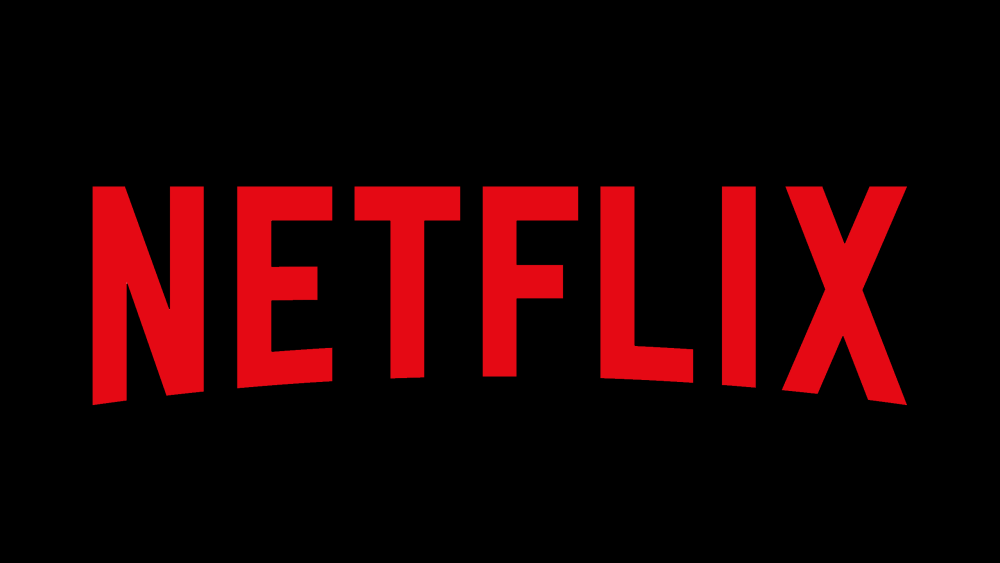

#**Project Summary**

#**GitHub Link**

https://github.com/Sid-9823/Netflix-Movies-and-TV-Shows-Clustering.git

#**Problem statement**

###**BUSINESS PROBLEM OVERVIEW**

**This dataset contains TV series and films that are currently accessible on Netflix as of 2019. The data was gathered through Flixable, a third-party Netflix search engine.**

**In 2018, they published an intriguing analysis revealing that the amount of TV series available on Netflix has almost tripled since 2010. Since 2010, the number of films on the streaming service has declined by almost 2,000 titles, while the number of TV episodes has almost tripled. It will be fascinating to see what additional insights can be extracted from the same information.**

**By matching text-based characteristics, we will cluster comparable material.**


### **Data Description**

**The dataset contains TV series and movies information such as show_id, type, title, director, cast, country, date_added, release_year, rating, duration, listed_in and description.**

**Feature's Information :**
* ***show_id*** : *Unique ID for every Movie / Tv Show.*

* ***type*** : *Identifier - A Movie or TV Show.*
* ***title*** : *Title of the movie / show.*
* ***Director*** : *Director of the show*
* ***cast*** : *Actors involved.*
* ***Country*** : *Country of production.*
* ***date_added*** : *Date it was added on Netflix.*
* ***release_year*** : *Actual release year of the show.*
* ***rating*** : *TV rating of the show.*
* ***duration*** : *Total duration in minutes or number of seasons.*
* ***listed_in*** : *Genre.*
* ***Description*** : *The summary description.*

#**Importing necessary libraries**

In [2]:
# Importing Numpy & Pandas for data processing & data wrangling.

import numpy as np
import pandas as pd

# Importing tools for visualization.

import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# Importing libraries for Hypothesis testing.

from scipy.stats import uniform
from scipy.stats import norm
from scipy.stats import chi2
from scipy.stats import t
from scipy.stats import f
from scipy.stats import ttest_ind
import scipy.stats as stats

# Word Cloud library.

from wordcloud import WordCloud, STOPWORDS

# Libraries used for textual data preprocessing.

import string
string.punctuation
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem.snowball import SnowballStemmer
from scipy.stats import ttest_ind
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA

# Libraries used for Clustering.

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc

# Libraries used for building recommendation system.

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# **Data collection and analysis**

##**Data Loading and Basic Analysis**

In [3]:
# Loading the data from csv file to a pandas dataframe.

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

In [4]:
# Printing first 5 rows.

df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [5]:
 # Printing last 5 rows.

df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


In [6]:
# Checking the number of rows and columns in our dataset.

df.shape

(7787, 12)

In [7]:
# Gathering information about our dataset such as null count values and data types involved.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [8]:
# Printing number of unique values in our dataset.

df.nunique()

show_id         7787
type               2
title           7787
director        4049
cast            6831
country          681
date_added      1565
release_year      73
rating            14
duration         216
listed_in        492
description     7769
dtype: int64

In [9]:
# Checking null values.

df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

* ***As we can see there are missing values in director, cast, country, date_added and rating column in this dataframe.***

##**Data wrangling**

In [10]:
# Renaming our column's.

df = df.rename(columns={'show_id':'si','type':'typ','title':'tit','director':'dtr','cast':'cst','country':'cnt',
                        'date_added':'da','release_year':'ry','rating':'rtng','duration':'dur','listed_in':'li','description':'des'})

* ***Changing column's names as per our convenience as it becomes easier working with small feature names.***

In [11]:
# Handling Null values.

df['cst'].fillna(value = 'Unavailable',inplace = True)

df['cnt'].fillna(value = df['cnt'].mode()[0],inplace = True)

* ***In our 'Cast' column, we are filling our null cells with the 'Unavailable'.***

* ***In 'Country' column, we are filling out null cells with the mode of the column.***

In [12]:
# Dropping missing values.

df.dropna(subset = ['rtng','da'],inplace = True)

* ***Dropping missing values from 'rating' and 'date_added' column as there are very few null cells in these columns.***

In [13]:
# Dropping 'director' column.

df.drop(['dtr'],inplace = True, axis = 1)

* ***Dropping 'director' column as it's missing more than 30% values in it.***

In [14]:
# Checking for null values after handling them.

df.isnull().sum()

si      0
typ     0
tit     0
cst     0
cnt     0
da      0
ry      0
rtng    0
dur     0
li      0
des     0
dtype: int64

* ***As we can see, there are no null values present in our dataset now.***

# **Exploratory Data Analysis and Visualization**

**What is EDA ?**

***Exploratory Data Analysis can be considered as a process which is used to visualise data and it helps to uncover the underlying pattern and relations between the dependent and independent variable's which can be useful in decision making.***

###**type**

Text(0.5, 1.0, 'Number of TV Shows and Movies in our dataset')

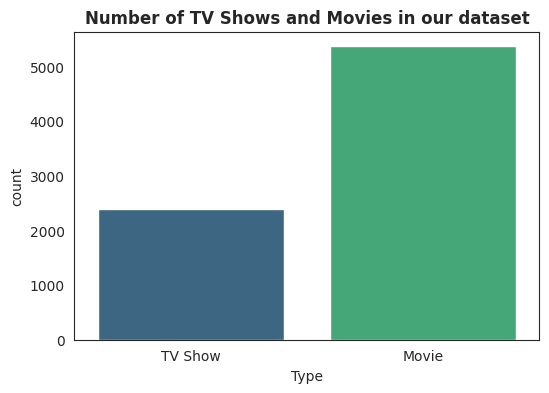

In [15]:
# Plotting a countplot for this column.

sns.set_style(style='white')
plt.figure(figsize=(6,4))
sns.countplot(x = df['typ'],palette='viridis')
plt.xlabel('Type')
plt.title('Number of TV Shows and Movies in our dataset',fontweight = 'bold')

* ***As we can see in the above countplot, there are more movies in our dataset as compared to TV shows.***

In [16]:
# Number of entries in each category.

df['typ'].value_counts()

Movie      5372
TV Show    2398
Name: typ, dtype: int64

* ***There are 5372 movies and 2398 TV shows in our dataset.***

###**Country**

In [17]:
# Creating separate two variables for TV Shows and Movies.

mov = df[df['typ'] == 'Movie']

tv =  df[df['typ'] == 'TV Show']

Text(0.5, 1.0, 'Top 10 countries with highest number of movies on the platform')

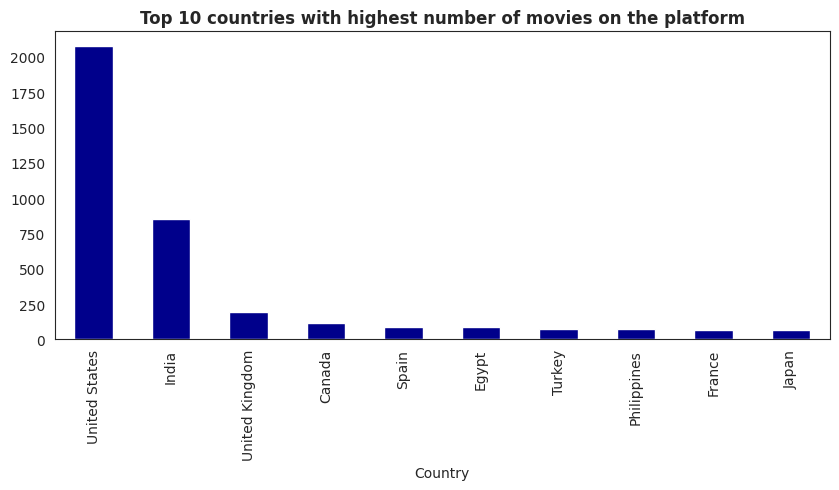

In [18]:
# Plotting a barplot.

plt.figure(figsize=(10,4))
mov['cnt'].value_counts().head(10).plot(kind = 'bar',color = 'darkblue')
plt.xlabel('Country')
plt.title('Top 10 countries with highest number of movies on the platform',fontweight = 'bold')

* ***The United States has the highest number of Movies on Netflix, followed by India, the United Kingdom, Canada, and several other countries.***

In [19]:
# Printing top 10 countries with highest number of movies.

mov['cnt'].value_counts().head(10)

United States     2076
India              852
United Kingdom     193
Canada             118
Spain               89
Egypt               89
Turkey              73
Philippines         70
France              69
Japan               69
Name: cnt, dtype: int64

* ***There are 2076 movie titles from the United States on Netflix, followed by India with 852 titles, along with several other countries.***

Text(0.5, 1.0, 'Top 10 countries with highest number of TV shows on the platform')

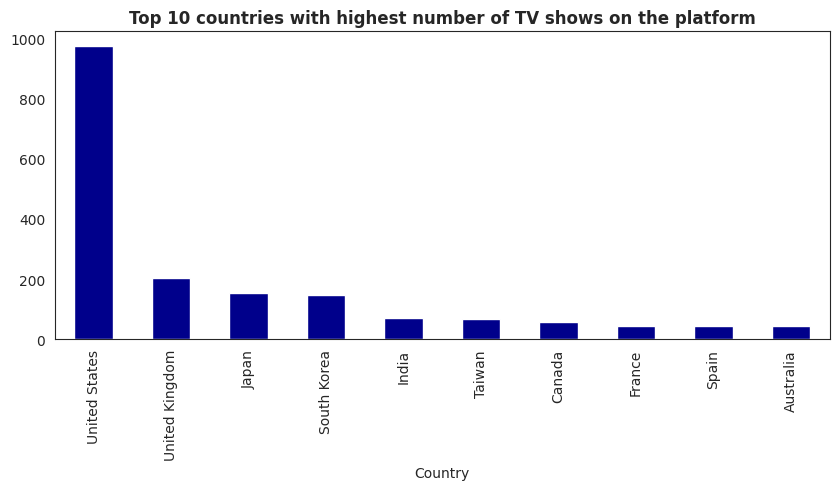

In [20]:
# Plotting a barplot.

plt.figure(figsize=(10,4))
tv['cnt'].value_counts().head(10).plot(kind = 'bar',color = 'darkblue')
plt.xlabel('Country')
plt.title('Top 10 countries with highest number of TV shows on the platform',fontweight = 'bold')

* ***The United States still has the highest number of TV shows on Netflix, followed by the United Kingdom, Japan, and several other countries.***

In [21]:
# Printing top 10 countries.

tv['cnt'].value_counts().head(10)

United States     975
United Kingdom    203
Japan             155
South Korea       147
India              71
Taiwan             68
Canada             59
France             46
Spain              45
Australia          44
Name: cnt, dtype: int64

* ***There are 975 TV shows from the United States on Netflix, followed by the United Kingdom with 203 TV shows, along with several other countries.***

###**rating**

Text(0.5, 1.0, 'Different ratings of movies on the platform')

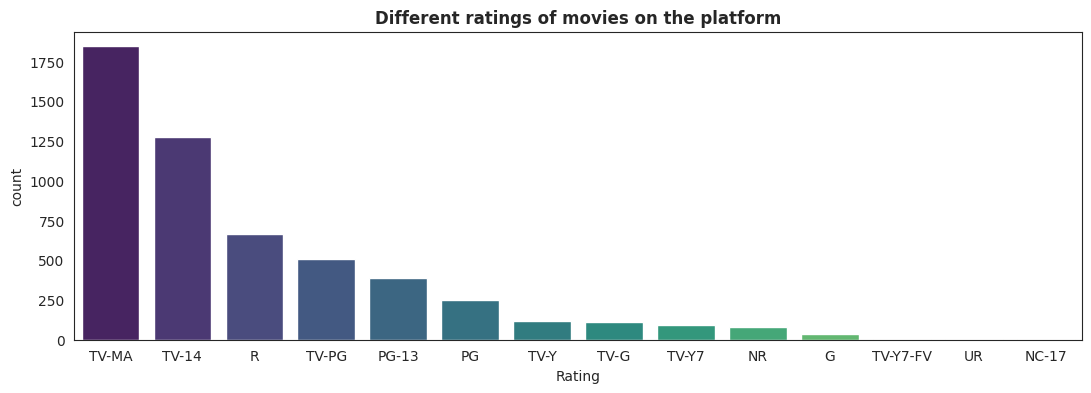

In [22]:
# Plotting a countplot.

plt.figure(figsize=(13,4))
sns.countplot(x = mov['rtng'], order = mov['rtng'].value_counts().index,palette = 'viridis')
plt.xlabel('Rating')
plt.title('Different ratings of movies on the platform',fontweight = 'bold')

* ***As we can observe by the above plot, the majority of the movies on our platform are for TV: MA (Mature Audience), followed by TV: 14 (Content unsuitable for children under 14), R (Restricted to viewers over 17 years old), and several other categories.***

In [23]:
# Number of different entries.

mov['rtng'].value_counts()

TV-MA       1845
TV-14       1272
R            663
TV-PG        505
PG-13        386
PG           247
TV-Y         117
TV-G         111
TV-Y7         95
NR            79
G             39
TV-Y7-FV       5
UR             5
NC-17          3
Name: rtng, dtype: int64

* ***There are 1845 movies of TV - MA rating followed by 1272 movies of TV - 14 rating with several other rating categories.***

Text(0.5, 1.0, 'Different ratings of TV Shows on the platform')

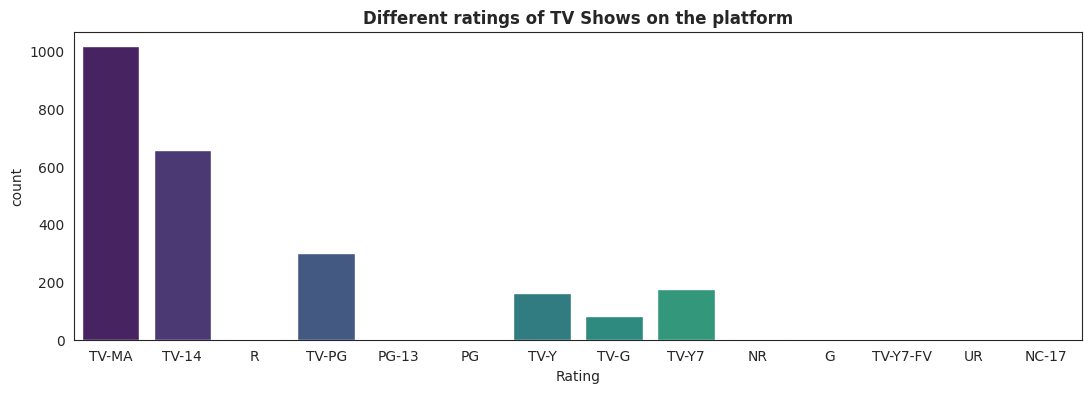

In [24]:
# Plotting a countplot.

plt.figure(figsize=(13,4))
sns.countplot(x = tv['rtng'], order = mov['rtng'].value_counts().index,palette = 'viridis')
plt.xlabel('Rating')
plt.title('Different ratings of TV Shows on the platform',fontweight = 'bold')

* ***TV Shows are also rated similarly to the movies on the platform.***

In [25]:
# Number of different entries.

tv['rtng'].value_counts()

TV-MA       1016
TV-14        656
TV-PG        299
TV-Y7        175
TV-Y         162
TV-G          83
NR             4
R              2
TV-Y7-FV       1
Name: rtng, dtype: int64

* ***There are 1016 TV Shows with a TV - MA rating, followed by 656 TV Shows with a TV - 14 rating, and several other rating categories.***

###**duration**

Text(0.5, 1.0, 'Distribution of Movies duration (minutes)')

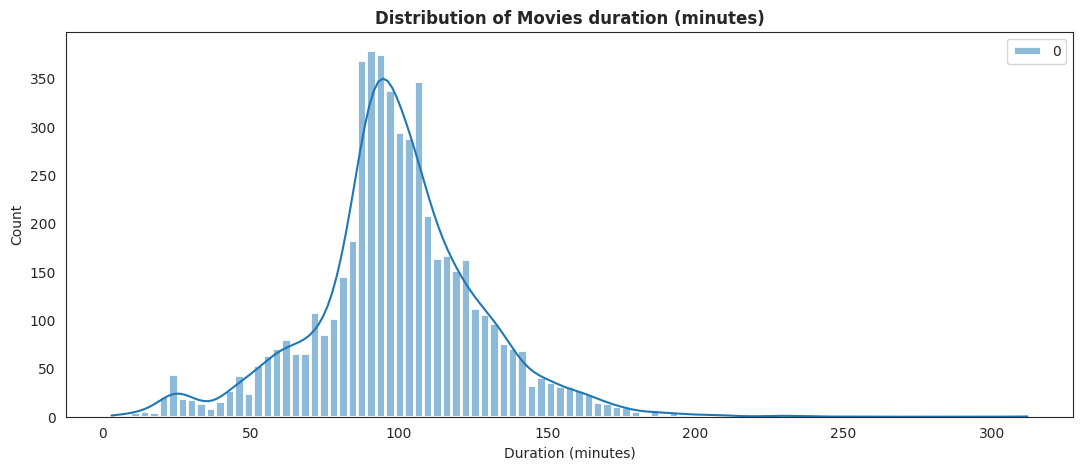

In [26]:
# Plotting a distribution plot.

plt.figure(figsize=(13,5))
sns.histplot(mov['dur'].str.extract('(\d+)').astype(int), kde = True, linewidth=2) # It is extracting digits from the mov['dur'] and plotting it.
plt.xlabel('Duration (minutes)')
plt.title('Distribution of Movies duration (minutes)', fontweight = 'bold')

* ***As we can observe in the above plot, it is following a near-normal distribution.***

* ***It also means that the majority of movies on the platform are of about 1.5 hours duration and can go up to 2.5 to 3 hours if the maximum duration is considered.***

Text(0.5, 1.0, 'Duration of TV shows (seasons)')

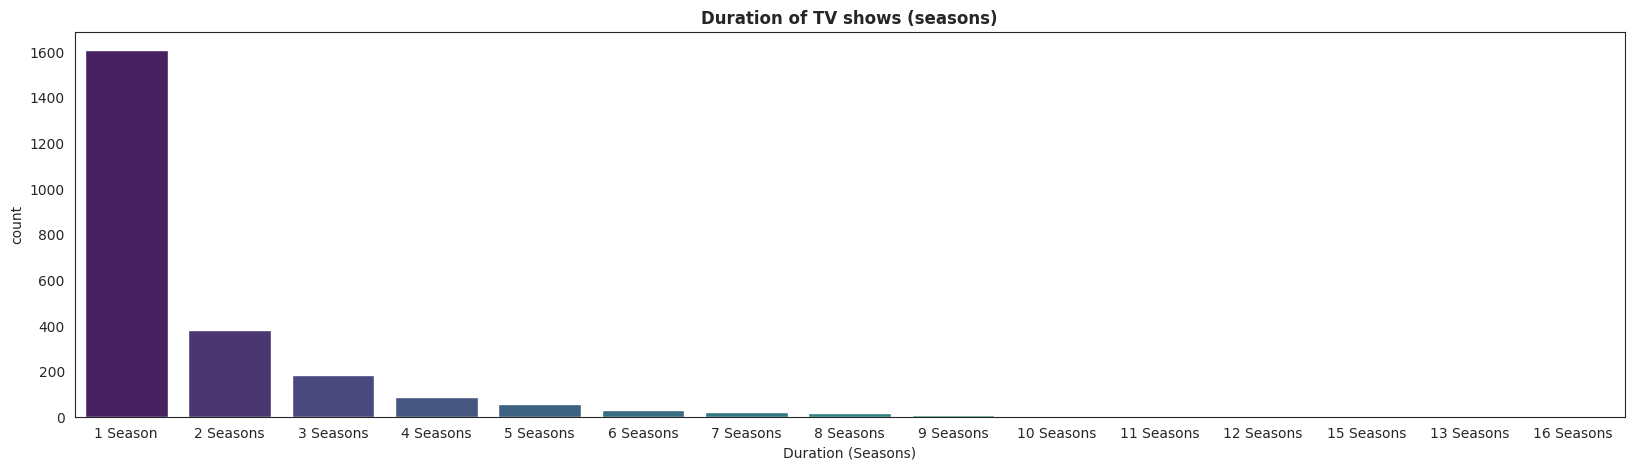

In [27]:
# Plotting a countplot.

plt.figure(figsize = (20,5))
sns.countplot(x = tv['dur'], order = tv['dur'].value_counts().index,palette = 'viridis')
plt.xlabel('Duration (Seasons)')
plt.title('Duration of TV shows (seasons)', fontweight = 'bold')

* ***The majority of TV Shows consist of 1 season on the platform, while the rest consist of 2 to 8 seasons.***

In [28]:
# Printing number of seasons.

tv['dur'].value_counts()

1 Season      1606
2 Seasons      378
3 Seasons      183
4 Seasons       86
5 Seasons       57
6 Seasons       30
7 Seasons       19
8 Seasons       18
9 Seasons        8
10 Seasons       5
11 Seasons       2
12 Seasons       2
15 Seasons       2
13 Seasons       1
16 Seasons       1
Name: dur, dtype: int64

* ***There are 1606 TV shows of 1 season and 378 TV shows of 2 seasons, followed by a few other TV shows ranging from 3 to 10 seasons.***

###**release_year**

Text(0.5, 1.0, 'Top 10 years in which highest movies were released')

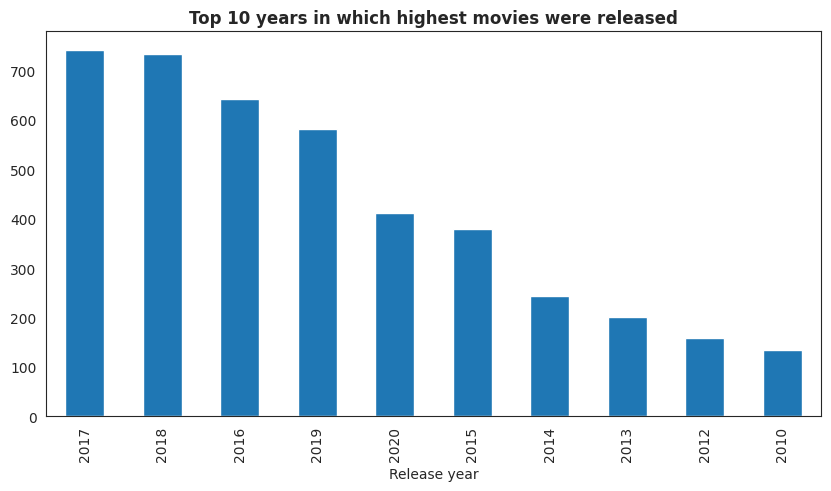

In [29]:
# Plotting a barplot.

plt.figure(figsize=(10,5))
mov['ry'].value_counts().head(10).plot(kind = 'bar')
plt.xlabel('Release year')
plt.title('Top 10 years in which highest movies were released', fontweight = 'bold')

* ***Most movies were released between 2017 and 2019.***

In [30]:
# Printing values.

mov['ry'].value_counts().head(15)

2017    742
2018    734
2016    642
2019    582
2020    411
2015    380
2014    244
2013    202
2012    158
2010    135
2011    127
2009    103
2008    102
2007     72
2006     72
Name: ry, dtype: int64

* ***These are the number of movies released in each respective year.***

Text(0.5, 1.0, 'Top 10 years in which highest TV Shows were released')

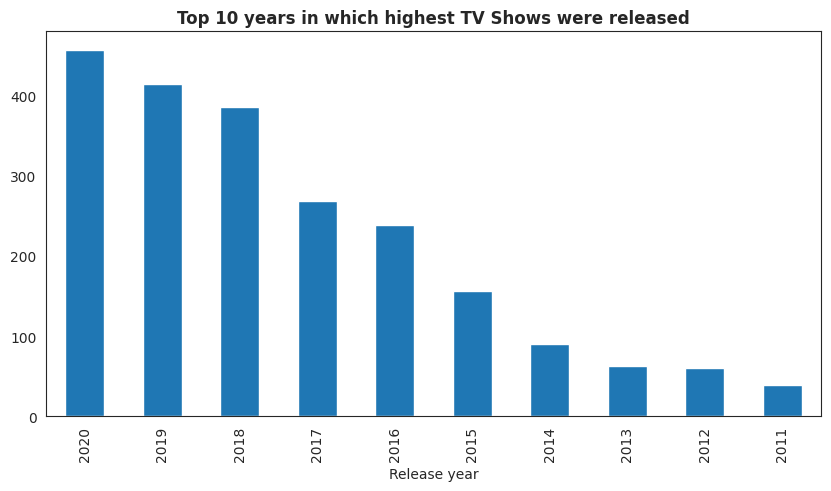

In [31]:
# Plotting a barplot.

plt.figure(figsize=(10,5))
tv['ry'].value_counts().head(10).plot(kind = 'bar')
plt.xlabel('Release year')
plt.title('Top 10 years in which highest TV Shows were released', fontweight = 'bold')

* ***Most TV shows were released between 2018 and 2020.***

In [32]:
# Printing values.

tv['ry'].value_counts().head(15)

2020    457
2019    414
2018    386
2017    268
2016    239
2015    156
2014     90
2013     63
2012     60
2011     39
2010     36
2009     34
2008     22
2021     19
2006     13
Name: ry, dtype: int64

* ***These are the number of TV shows released in each respective year.***

###**date_added**

In [33]:
# Converting strings to a datetime object.

movda = mov['da'].apply(lambda x : pd.to_datetime(x))
tvda  =  tv['da'].apply(lambda x : pd.to_datetime(x))

* ***Converting the Movie date added string to a datetime object and storing it in the 'movda' variable.***

* ***Converting TV Shows date-added string to a datetime object and storing it in the 'tvda' variable.***

Text(0.5, 1.0, 'Most additions of movies on Netflix year-wise')

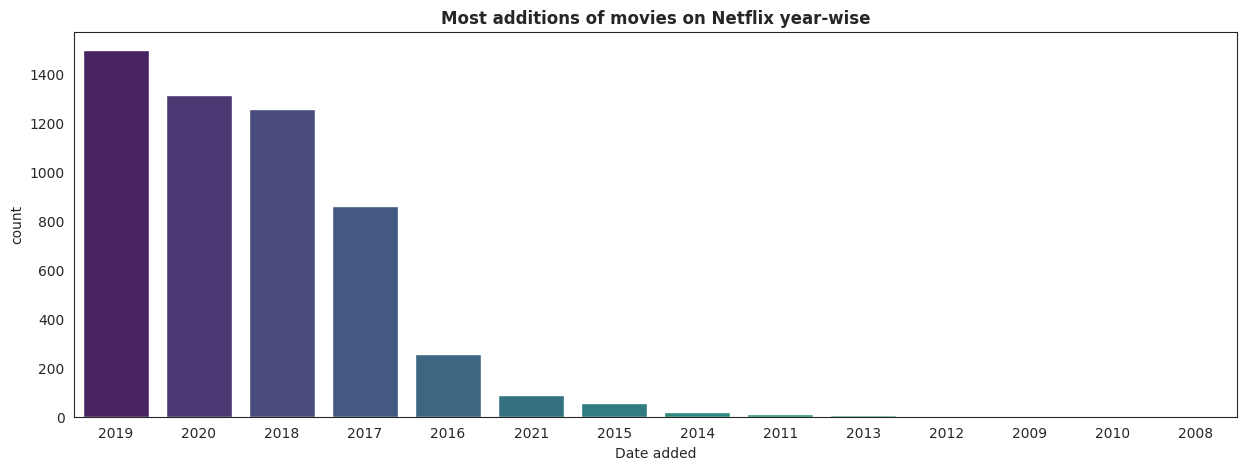

In [34]:
# Plotting a countplot.

plt.figure(figsize=(15,5))
sns.countplot(x = movda.dt.year, order = movda.dt.year.value_counts().index,palette = 'viridis')
plt.xlabel('Date added')
plt.title('Most additions of movies on Netflix year-wise', fontweight = 'bold')

* ***Most movies were added between 2017 and 2019.***

In [35]:
# Printing values.

movda.dt.year.value_counts()

2019    1497
2020    1312
2018    1255
2017     861
2016     256
2021      88
2015      58
2014      19
2011      13
2013       6
2012       3
2009       2
2010       1
2008       1
Name: da, dtype: int64

* ***These are the number of movies added in each respective year.***

Text(0.5, 1.0, 'Most additions of movies on Netflix month - wise')

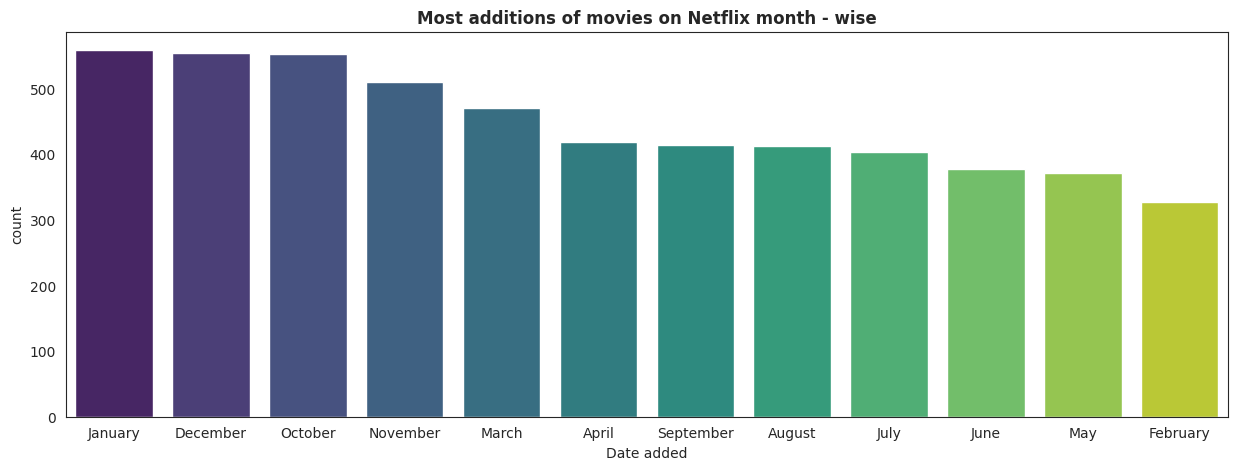

In [36]:
# Plotting a countplot.

plt.figure(figsize=(15,5))
sns.countplot(x = movda.dt.month_name(), order = movda.dt.month_name().value_counts().index,palette = 'viridis')
plt.xlabel('Date added')
plt.title('Most additions of movies on Netflix month - wise', fontweight = 'bold')

* ***Most movies were added to the platform in January, December, and October, as during this time there are new year's and Christmas holidays and people have spare time.***

In [37]:
# Printing values.

movda.dt.month_name().value_counts()

January      559
December     554
October      553
November     511
March        470
April        419
September    414
August       413
July         403
June         377
May          371
February     328
Name: da, dtype: int64

* ***These are the movies added in these respective months.***

Text(0.5, 1.0, 'Most additions of movies on Netflix weekday - wise')

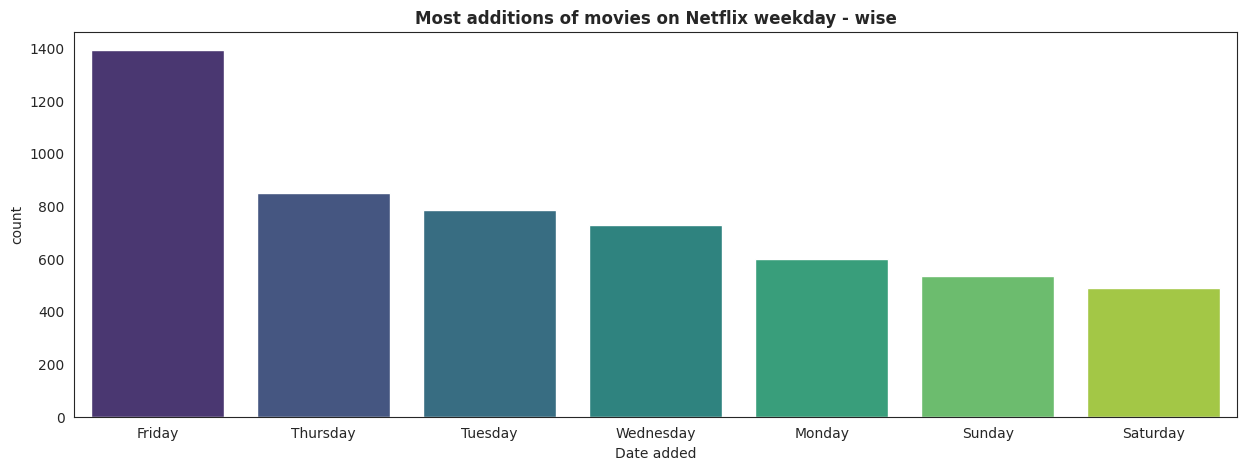

In [38]:
# Plotting a countplot.

plt.figure(figsize=(15,5))
sns.countplot(x = movda.dt.strftime("%A"), order = movda.dt.strftime("%A").value_counts().index,palette = 'viridis')
plt.xlabel('Date added')
plt.title('Most additions of movies on Netflix weekday - wise', fontweight = 'bold')

* ***Most movies on the platform were added on Friday, as it's the beginning of the weekend.***

In [39]:
# Printing values.

movda.dt.strftime("%A").value_counts()

Friday       1391
Thursday      847
Tuesday       784
Wednesday     726
Monday        599
Sunday        535
Saturday      490
Name: da, dtype: int64

* ***These are the movies added on these respective weekdays.***

Text(0.5, 1.0, 'Most additions of TV Shows on Netflix year-wise')

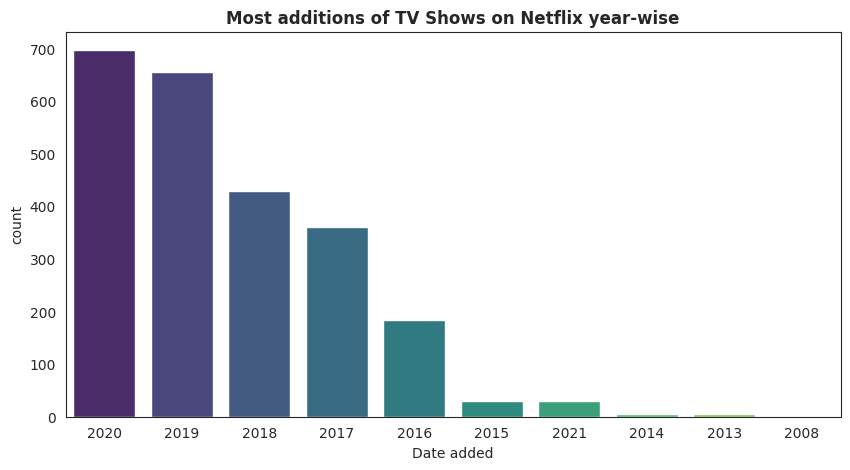

In [40]:
# Plotting a countplot.

plt.figure(figsize=(10,5))
sns.countplot(x = tvda.dt.year, order = tvda.dt.year.value_counts().index,palette = 'viridis')
plt.xlabel('Date added')
plt.title('Most additions of TV Shows on Netflix year-wise', fontweight = 'bold')

* ***Most TV Shows were added in 2019 and 2020.***

* ***Apart from these, the rest were added between 2016 and 2018.***

In [41]:
# Printing values.

tvda.dt.year.value_counts()

2020    697
2019    656
2018    429
2017    361
2016    184
2015     30
2021     29
2014      6
2013      5
2008      1
Name: da, dtype: int64

* ***These are the number of TV shows added in each respective year.***

Text(0.5, 1.0, 'Most additions of TV Shows on Netflix month - wise')

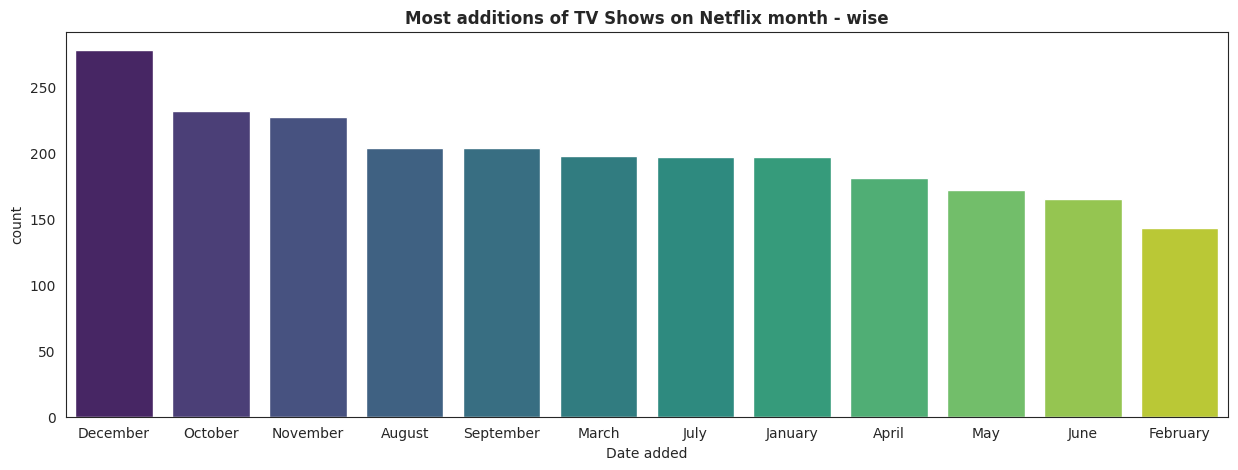

In [42]:
# Plotting a countplot.

plt.figure(figsize=(15,5))
sns.countplot(x = tvda.dt.month_name(), order = tvda.dt.month_name().value_counts().index,palette = 'viridis')
plt.xlabel('Date added')
plt.title('Most additions of TV Shows on Netflix month - wise', fontweight = 'bold')

* ***Most TV shows were added to the platform in December, October, and November.***

In [43]:
# Printing values.

tvda.dt.month_name().value_counts()

December     278
October      232
November     227
August       204
September    204
March        198
July         197
January      197
April        181
May          172
June         165
February     143
Name: da, dtype: int64

* ***These are the TV Shows added in these respective months.***

Text(0.5, 1.0, 'Most additions of TV Shows on Netflix weekday - wise')

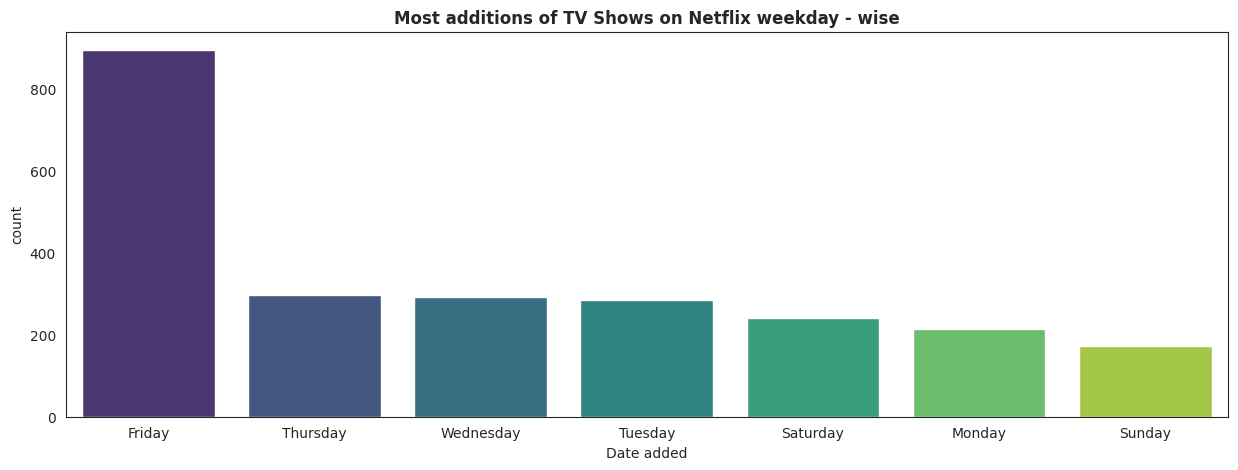

In [44]:
# Plotting a countplot.

plt.figure(figsize=(15,5))
sns.countplot(x = tvda.dt.strftime("%A"), order = tvda.dt.strftime("%A").value_counts().index,palette = 'viridis')
plt.xlabel('Date added')
plt.title('Most additions of TV Shows on Netflix weekday - wise', fontweight = 'bold')

* ***TV Shows are following the same trend as movies.***

* ***Most TV shows were added to the platform on Friday.***

In [45]:
# Printing values.

tvda.dt.strftime("%A").value_counts()

Friday       895
Thursday     297
Wednesday    293
Tuesday      285
Saturday     241
Monday       214
Sunday       173
Name: da, dtype: int64

* ***These are the number of TV Shows added on these respective weekdays.***

###**listed_in**

Text(0.5, 1.0, 'Movies listed in different categories')

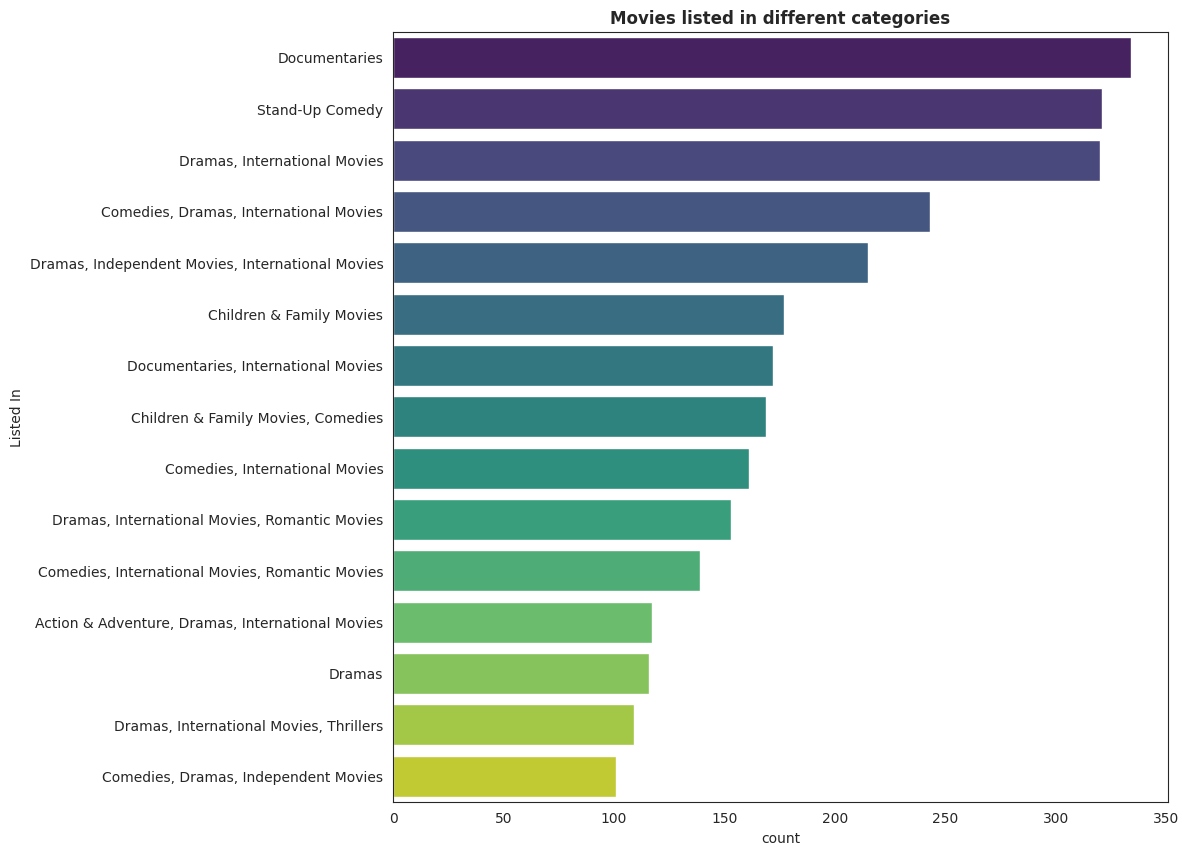

In [46]:
# Plotting a countplot.

plt.figure(figsize=(10,10))
sns.countplot(y = mov['li'], order = mov['li'].value_counts().head(15).index,palette = 'viridis')
plt.ylabel('Listed In')
plt.title('Movies listed in different categories',fontweight = 'bold')

* ***The majority of the movies on the platform are in the documentaries category.***

* ***The rest are related to stand-up comedy, International movies, and drama genres.***

In [47]:
# Printing values.

mov['li'].value_counts().head(15)

Documentaries                                       334
Stand-Up Comedy                                     321
Dramas, International Movies                        320
Comedies, Dramas, International Movies              243
Dramas, Independent Movies, International Movies    215
Children & Family Movies                            177
Documentaries, International Movies                 172
Children & Family Movies, Comedies                  169
Comedies, International Movies                      161
Dramas, International Movies, Romantic Movies       153
Comedies, International Movies, Romantic Movies     139
Action & Adventure, Dramas, International Movies    117
Dramas                                              116
Dramas, International Movies, Thrillers             109
Comedies, Dramas, Independent Movies                101
Name: li, dtype: int64

* ***These are the number of movies in different genres.***

Text(0.5, 1.0, 'TV Shows listed in different categories')

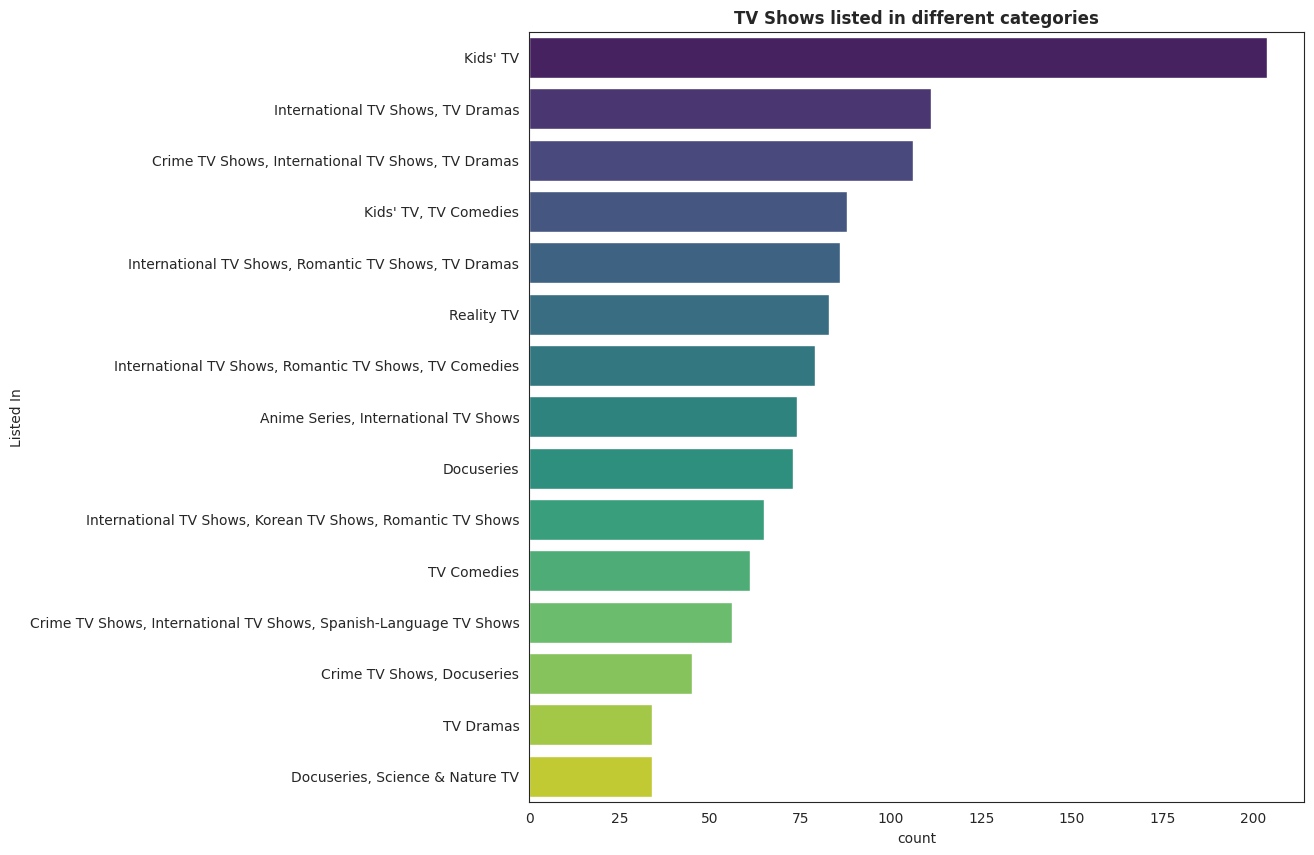

In [48]:
# Plotting a countplot.

plt.figure(figsize=(10,10))
sns.countplot(y = tv['li'], order = tv['li'].value_counts().head(15).index,palette = 'viridis')
plt.ylabel('Listed In')
plt.title('TV Shows listed in different categories',fontweight = 'bold')

* ***The majority of the TV shows on the platform are of a kid-related genre.***

* ***The rest are related to the crime, international, and drama genres.***

In [49]:
# Printing values.

tv['li'].value_counts().head(15)

Kids' TV                                                             204
International TV Shows, TV Dramas                                    111
Crime TV Shows, International TV Shows, TV Dramas                    106
Kids' TV, TV Comedies                                                 88
International TV Shows, Romantic TV Shows, TV Dramas                  86
Reality TV                                                            83
International TV Shows, Romantic TV Shows, TV Comedies                79
Anime Series, International TV Shows                                  74
Docuseries                                                            73
International TV Shows, Korean TV Shows, Romantic TV Shows            65
TV Comedies                                                           61
Crime TV Shows, International TV Shows, Spanish-Language TV Shows     56
Crime TV Shows, Docuseries                                            45
TV Dramas                                          

* ***These are the numbers of TV shows in different genres.***

### **Sweetviz**

* ***Sweetviz is an open-source Python tool that provides attractive, high-density visualisations to jumpstart EDA (Exploratory Data Analysis) with just two lines of code. Output is a fully self-contained HTML application. The technology is designed to let users easily see target values and compare datasets.***

* ***We can use this technique even for predicting correlation between numerical and categorical features.***

In [50]:
!pip install sweetviz  # Installing sweetviz

import sweetviz as sv  # Importing sweetviz

In [51]:
rep = sv.analyze(df)      # Applying sweetviz on our dataset.

/usr/local/lib/python3.10/dist-packages/sweetviz/dataframe_report.py:74: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  all_source_names = [cur_name for cur_name, cur_series in source_df.iteritems()]
/usr/local/lib/python3.10/dist-packages/sweetviz/dataframe_report.py:109: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  filtered_series_names_in_source = [cur_name for cur_name, cur_series in source_df.iteritems()


                                             |          | [  0%]   00:00 -> (? left)

/usr/local/lib/python3.10/dist-packages/sweetviz/series_analyzer_text.py:19: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for item in to_process.source_counts["value_counts_without_nan"].iteritems():
/usr/local/lib/python3.10/dist-packages/sweetviz/series_analyzer_cat.py:28: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for item in category_counts.iteritems():
/usr/local/lib/python3.10/dist-packages/sweetviz/series_analyzer_text.py:19: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for item in to_process.source_counts["value_counts_without_nan"].iteritems():
/usr/local/lib/python3.10/dist-packages/sweetviz/series_analyzer_text.py:19: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for item in to_process.source_counts["value_counts_without_nan"].iteritems():
/usr/local

Report rep.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.



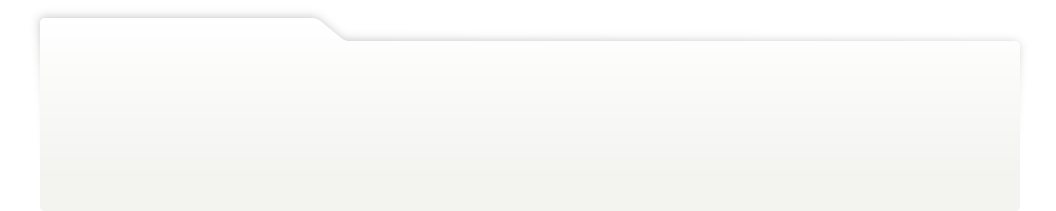
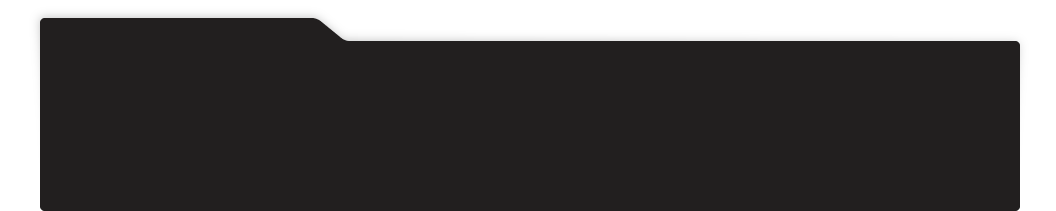
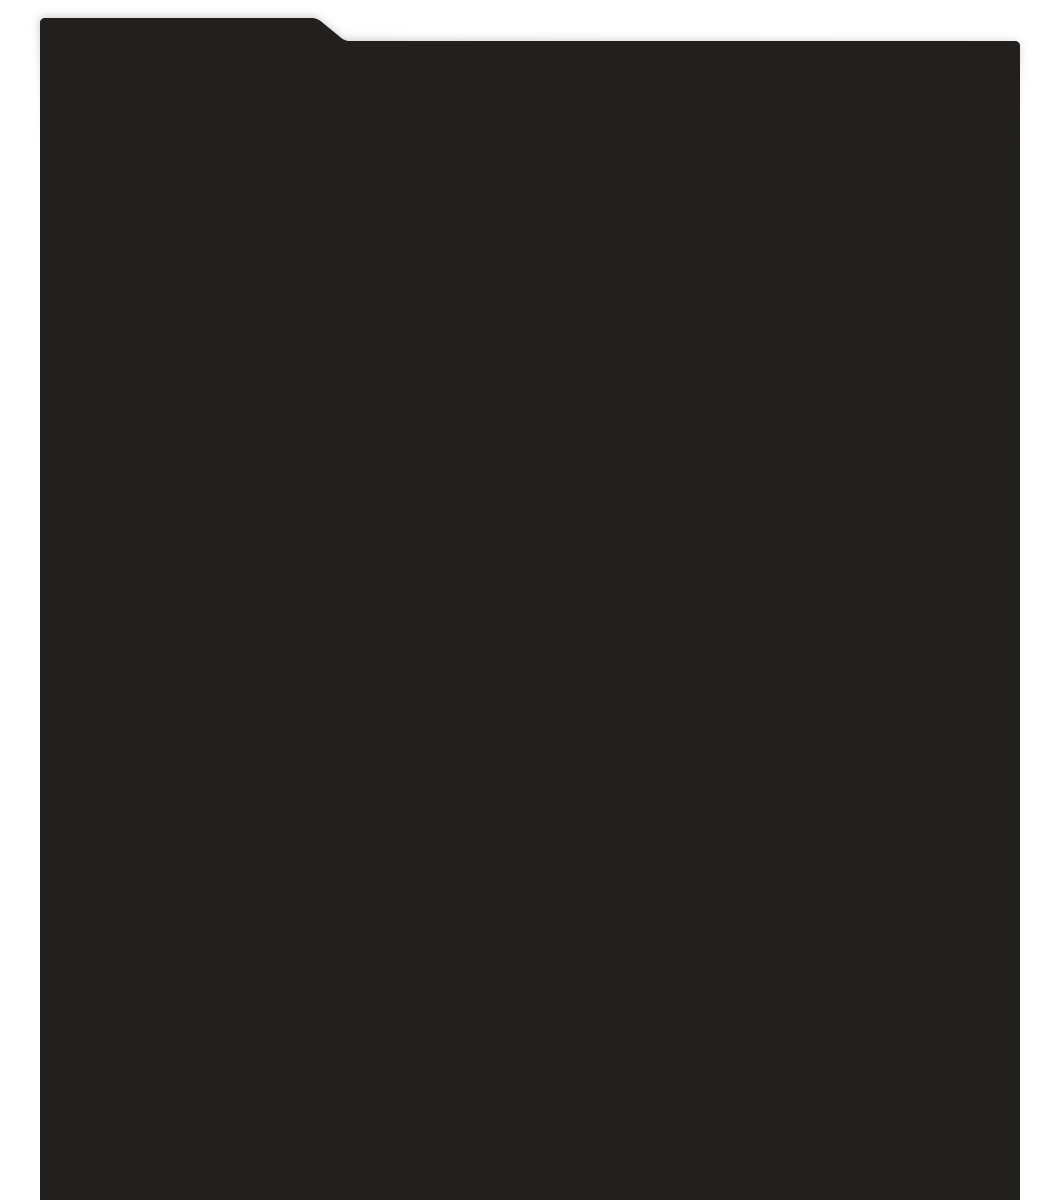
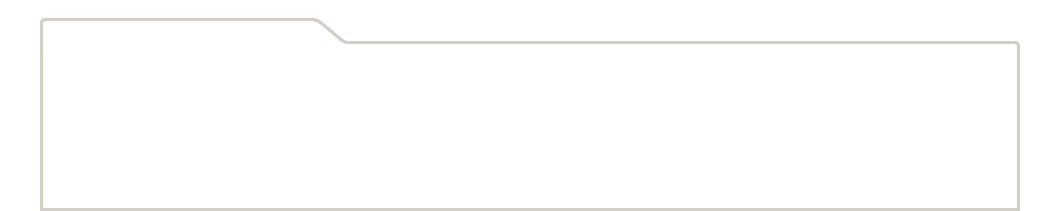
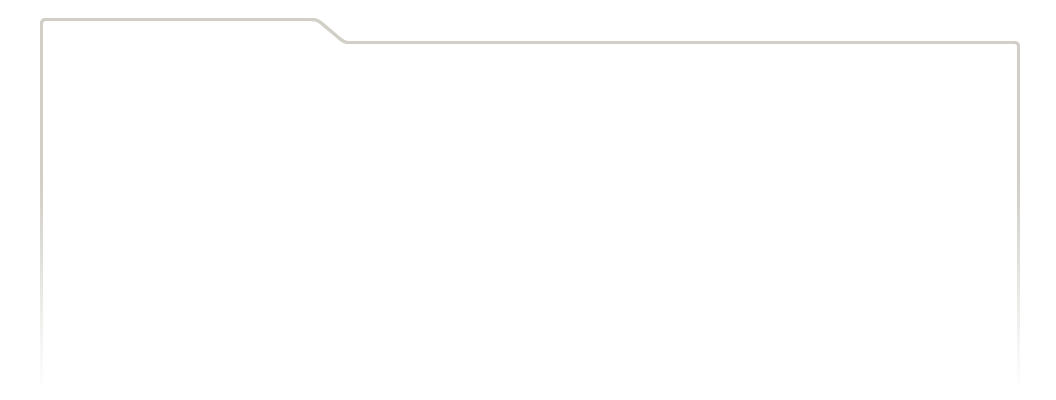
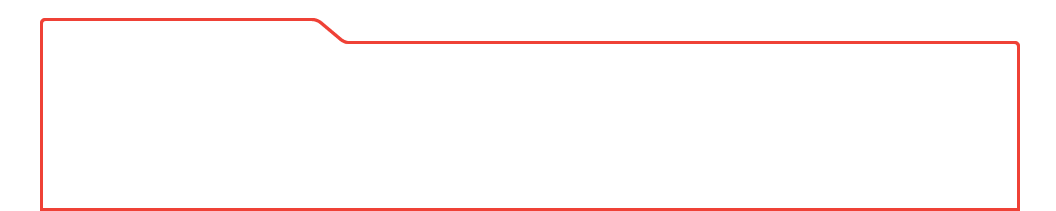
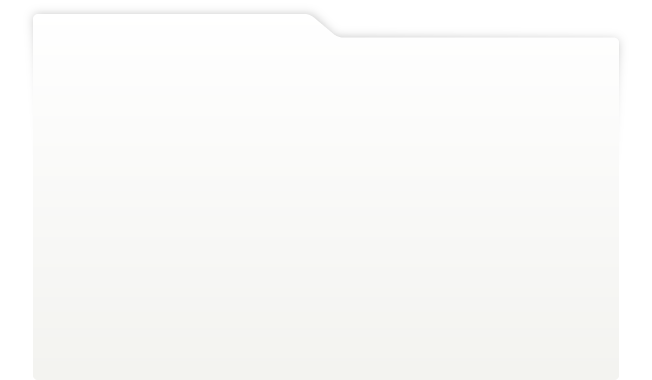
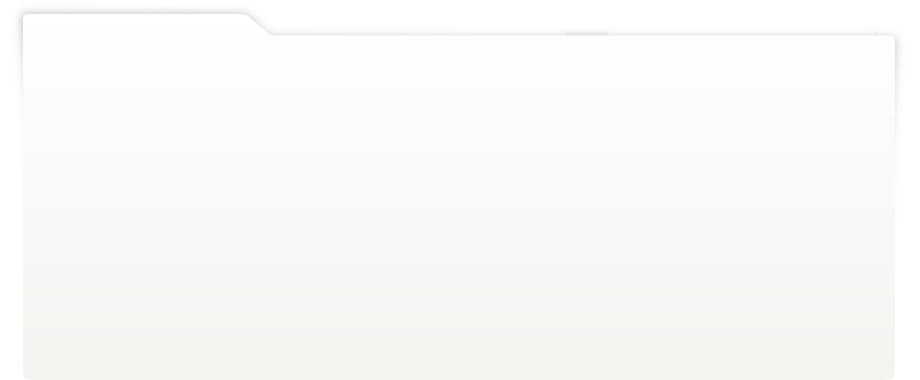
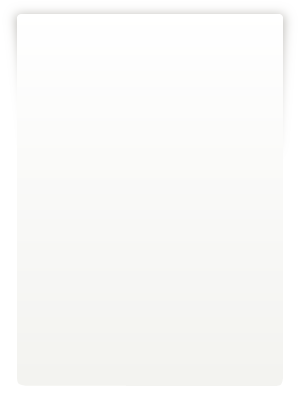
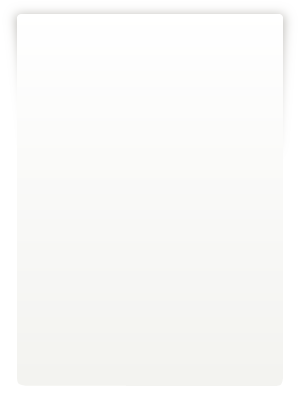
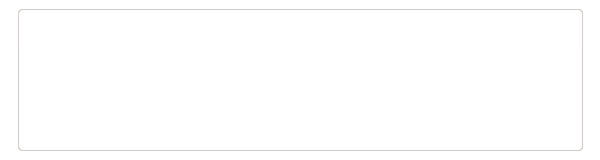
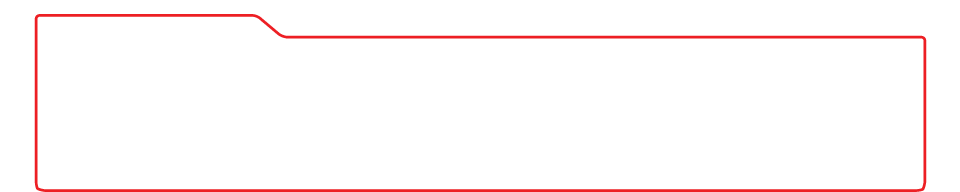
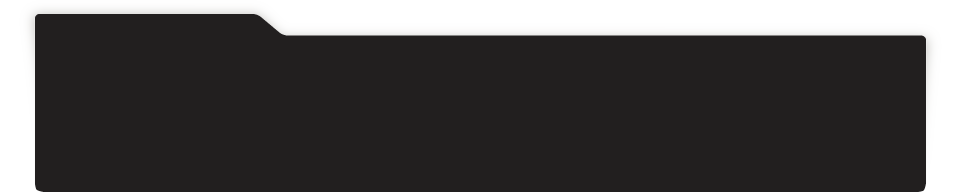
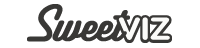
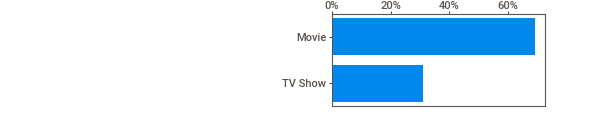
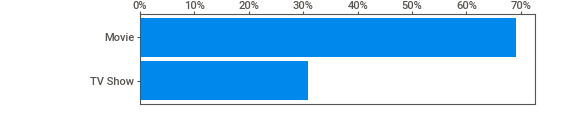
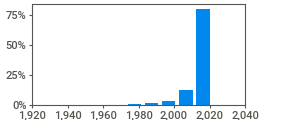
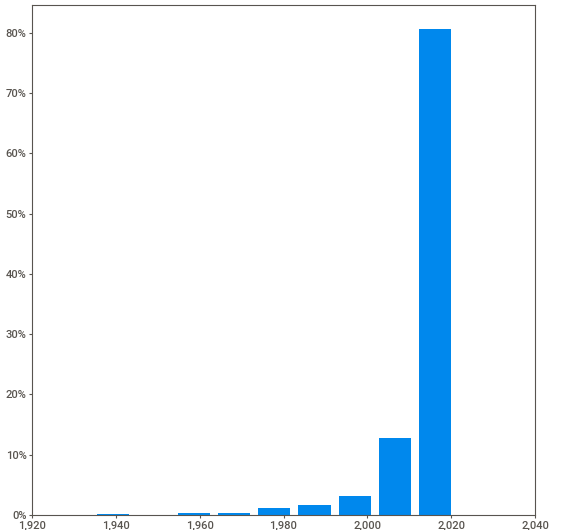
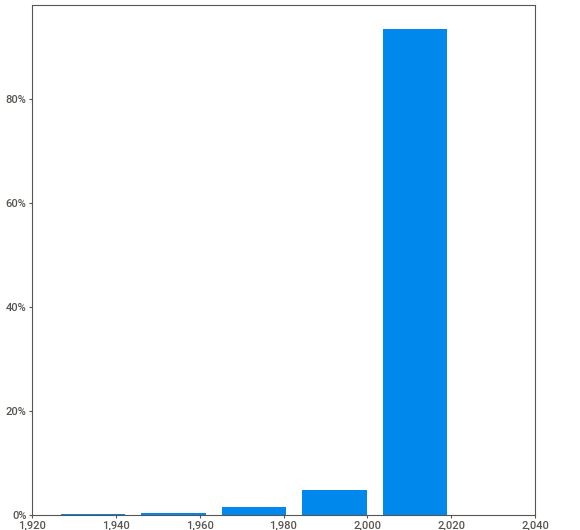
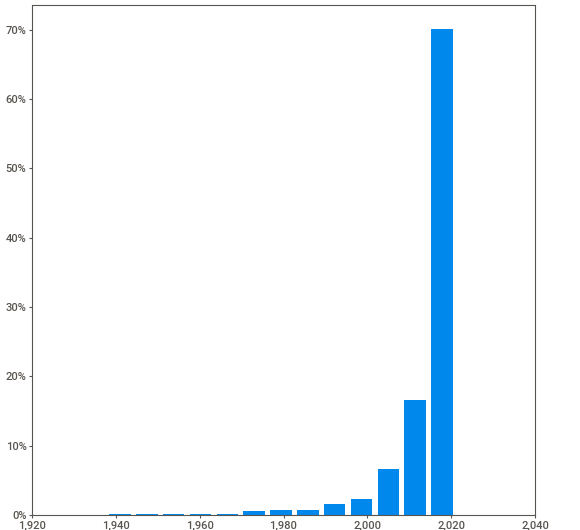
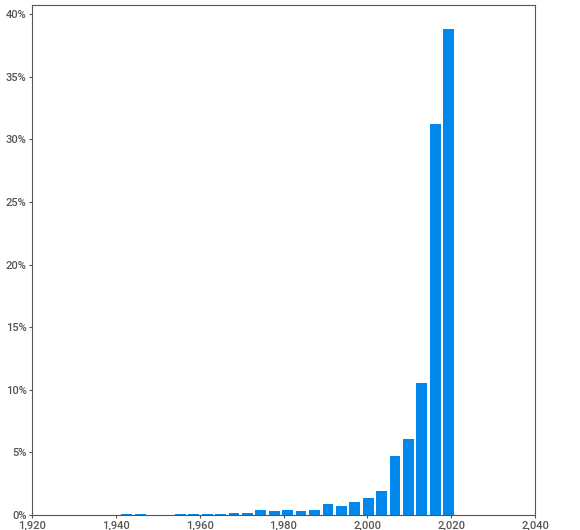
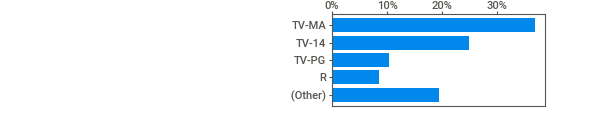
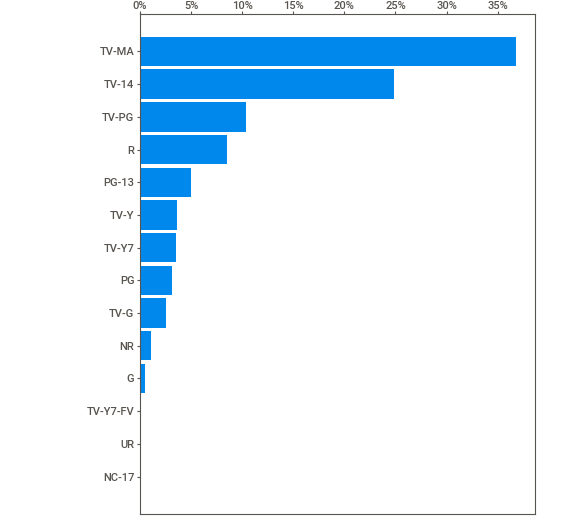
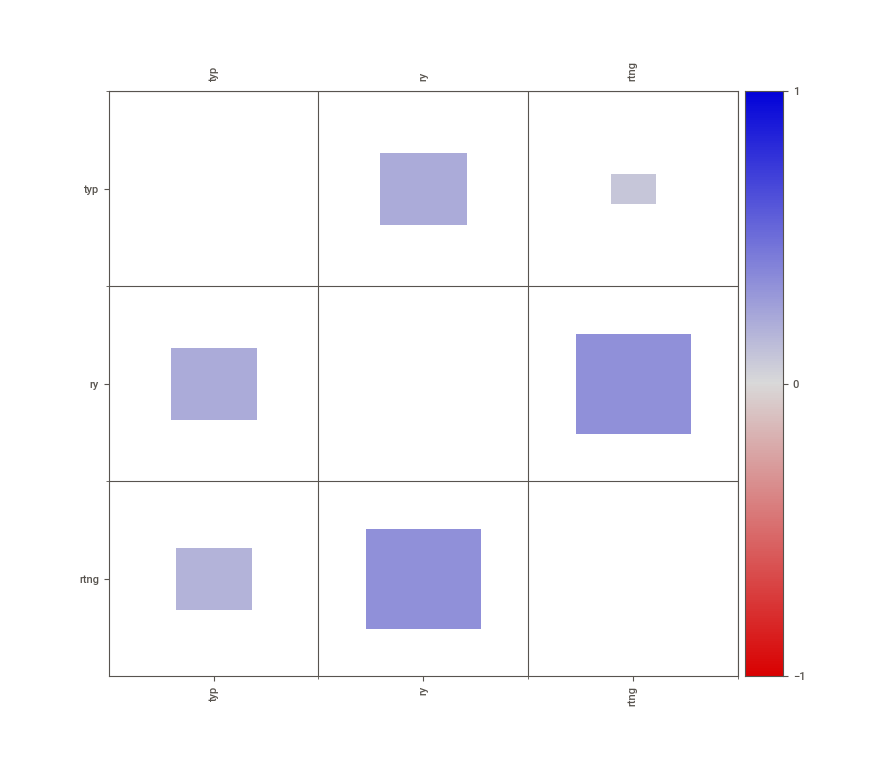
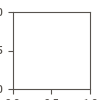

In [52]:
rep.show_html('rep.html') # Saving the report to an HTML file.

rep.show_notebook()       # Display the report in a Jupyter Notebook.

* ***Type :***

 * ***Our whole dataset comprises of 69 % Movies and 31 % TV Shows.***

* ***Country :***

 * ***39% of content (TV Shows and Movies) on the platform is from US.***

  * ***12% of content (TV Shows and Movies) on the platform is from India.***

  * ***5% of content (TV Shows and Movies) on the platform is from UK.***

* ***Released year :***

 * ***14.4% (1120) content(tv shows and movies) of our whole dataset was released in 2018.***

 * ***13% (1010) content(tv shows and movies) of our dataset was released in 2017.***
  
 * ***12.8% (996) content(tv shows and movies) of our dataset was released in 2019.***

 * ***It is showing 30% positive correlation with rating***

* ***Rating :***

 * ***Showing 13% correlation with 'type'.***

 * ***37% content (TV Shows and Movies) on the platform is rated TV - MA (Mature Audience).***

  * ***25% content (TV Shows and Movies) on the platform is rated TV - 14 (Content unsuitable for children under 14).***

  * ***10% content (TV Shows and Movies) on the platform is rated TV - PG (Parental Guidance).***

* ***Duration :***

 * ***21% TV Shows on the platform consist 1 season while 5% are of 2 seasons.***

#**Hypothesis Testing**

**What is Hypothesis testing?**


* ***We can define hypothesis testing as a method of statistical inference which is used to determine if the evidence at hand sufficiently supports a given hypothesis. Hypothesis testing enables us to make probabilistic assumptions regarding population parameters.***


* ***At first, we have to assume few hypothetical statements upon which we could perform hypothesis testing.***


* ***Let's assume these three statements :***

 * **The United States has the most content, followed by India. India has the most Netflix films.**

 *  **According to the countplot, Netflix looks to add the most amount of films and TV series between October and January. This appears to be Netflix's busiest time of year for releasing new content to its site.**

 * **With 5372 movies and 2398 TV shows now accessible on Netflix, the number of movies outnumbers the number of TV series.**

###**Hypothetical Statement 1**

**This is our research hypothesis :**

* "**The United States has the most content, followed by India. US has the most Netflix films.**"

* **Null Hypothesis ($H_0$) : The average number of movies on the platform produced by the US and India is the same.**

* **Alternate Hypothesis ($H_a$) : The average number of movies on the platform produced by the US is greater than the number of movies produced by India.**

In [53]:
usm  = mov[mov['cnt'] == 'United States']    # Filtering dataset on the basis of movies and 'United States'.

indm = mov[mov['cnt'] == 'India']            # Filtering dataset on the basis of movies and 'India'.

In [54]:
# Performing appropriate statistical test (t-test) for p-value.

t, p = ttest_ind(usm['ry'], indm['ry'], equal_var=False)      # Using equal_var=False as the sample sizes and variances of the two groups are not equal.

* ***We are performing an independent ' two-sample t-test ' between the release years of US movies and India movies.***

* ***The t-test is used to determine if there is a significant difference between the means of the two groups.***

In [55]:
# Creating a basic if else condition for the output.

alpha = 0.05   # Significance level.

if p < alpha :

  print('Rejecting Null Hypothesis. The average number of movies on the platform produced by the US is greater than the number of movies produced by India.')

else :

  print( 'Failing to reject Null Hypothesis. The average number of movies on the platform produced by the US and India is the same.')

Rejecting Null Hypothesis. The average number of movies on the platform produced by the US is greater than the number of movies produced by India.


* **To get the p-value, we used the t-test**.

* **We have enough data to reject $H_0$. As a result, the average number of movies on the platform produced by the US is greater than the number of movies produced by India.**

###**Hypothetical Statement 2**

**This is our research hypothesis :**

* "**According to the countplot, Netflix looks to add the most amount of films and TV series between October and January. This appears to be Netflix's busiest time of year for releasing new content to its site.**"

* **Null Hypothesis ($H_0$) : There is no relation between adding content to the platform on specific months.**

* **Alternate Hypothesis ($H_a$) : There is relation between adding content to the platform on specific months.**

In [56]:
# Converting 'date added' column to datetime object.

df['da'] = pd.to_datetime(df['da'])

In [57]:
# Creating a new month column.

df['month added'] = df['da'].dt.month_name()

* ***Extracting month names from the newly created datetime object.***

In [58]:
# Creating a contingency table.

con = pd.crosstab(df['typ'], df['month added'])

In [59]:
# Performing appropriate statistical test (chi2) for p-value.

chi2_statistic, p_value, dof, expected = stats.chi2_contingency(con)

* ***Here, we are using chi2 test of independence to calculate p-value.***

* ***The chi-square test of independence is used to determine if there is a significant association between two categorical variables.***

In [60]:
# Creating a basic if else condition for the output.

alpha = 0.05

if p_value < alpha :

  print('Failing to reject Null Hypothesis. There is no relation between adding content to the platform on specific months.')

else :

  print( 'Rejecting Null Hypothesis. There is relation between adding content to the platform on specific months.')

Rejecting Null Hypothesis. There is relation between adding content to the platform on specific months.


* **To get the p-value, we used the chi2 test.**

* **We have enough data to reject $H_0$. As a result, there is relation between adding content to the platform on specific months.**

###**Hypothetical Statement 3**

**This is our research hypothesis :**

* "**With 5372 movies and 2398 TV shows now accessible on Netflix, the number of movies outnumbers the number of TV series.**"

* **Null Hypothesis ($H_0$) : The number of movies and TV shows is the same; there is no difference.**

* **Alternate Hypothesis ($H_a$) : The number of movies is significantly larger than the number of TV shows on the platform.**

In [61]:
nmv = len(mov[mov['typ'] == 'Movie'])     # Filtering dataframe on the basis of count of Movies.

ntv = len(tv[tv['typ'] == 'TV Show'])     # Filtering dataframe on the basis of count of TV Shows.

In [62]:
# Performing appropriate statistical test (z-test) for p-value.

from statsmodels.stats.proportion import proportions_ztest        # Importing z-test.

In [63]:
# Parameters and sample sizes for the z-test.

counts = [nmv, ntv]

nobs = [len(df), len(df)]

In [64]:
# Performing z-test assuming equal proportions.

z_stata, p_value = proportions_ztest(counts, nobs, value=0, alternative='larger')

* ***Here, we are using z-test to compute p-value.***

* ***The z-test is used to compare two proportions and determine if they are significantly different from each other.***

In [65]:
# Printing output values.

print('Number of movies:', nmv)
print('Number of TV shows:', ntv)
print('z-statistic:', z_stata)
print('p-value:', p_value)

Number of movies: 5372
Number of TV shows: 2398
z-statistic: 47.71395895355864
p-value: 0.0


* ***We are getting a p-value of 0.***

In [66]:
# Creating a basic if else condition for the output.

alpha = 0.05   # Significance level.

if p_value < alpha :

  print('Rejecting Null Hypothesis. The number of movies is significantly larger than the number of TV shows on the platform.')

else :

  print( 'Failing to reject Null Hypothesis. The number of movies and TV shows is the same; there is no difference.')

Rejecting Null Hypothesis. The number of movies is significantly larger than the number of TV shows on the platform.


* **To get the p-value, we used the z-test test.**

* **We have enough data to reject $H_0$. As a result, the number of movies is significantly larger than the number of TV shows on the platform.**

#**Feature Engineering and Data-preprocessing**

* ***We have already handled missing values in our dataset.***

* ***In this dataset, there are no outliers, as most of the features contains textual data.***

* ***As we are dealing with textual data in this dataset, there are some mandatory textual data preprocessing steps that we need to perform.***

##**Textual Data preprocessing**

###**Collecting Textual Data**

In [67]:
# Creating a new feature 'text'.

df['text'] = df['des'] + df['li'] + df['rtng'] + df['cst'] + df['cnt']

* ***We are creating a new column called text, which stores texts from most of the columns, and we are performing textual data preprocessing on it.***

In [68]:
df['text']

0       In a future where the elite inhabit an island ...
1       After a devastating earthquake hits Mexico Cit...
2       When an army recruit is found dead, his fellow...
3       In a postapocalyptic world, rag-doll robots hi...
4       A brilliant group of students become card-coun...
                              ...                        
7782    When Lebanon's Civil War deprives Zozo of his ...
7783    A scrappy but poor boy worms his way into a ty...
7784    In this documentary, South African rapper Nast...
7785    Dessert wizard Adriano Zumbo looks for the nex...
7786    This documentary delves into the mystique behi...
Name: text, Length: 7770, dtype: object

* ***As we can see, all our textual information is in this one column now.***

In [69]:
# Printing 1st entry in this column.

df['text'][0]

'In a future where the elite inhabit an island paradise far from the crowded slums, you get one chance to join the 3% saved from squalor.International TV Shows, TV Dramas, TV Sci-Fi & FantasyTV-MAJoão Miguel, Bianca Comparato, Michel Gomes, Rodolfo Valente, Vaneza Oliveira, Rafael Lozano, Viviane Porto, Mel Fronckowiak, Sergio Mamberti, Zezé Motta, Celso FrateschiBrazil'

###**Removing Punctuation**

In [70]:
# Creating a function.

def rem_punc(text):

  import string                                         # A library that deals with strings.

  trans = str.maketrans('','', string.punctuation)      # Replacing the punctuations with no space, which in effect deletes the punctuation marks.

  return text.translate(trans)                          # Returns the text stripped of punctuation marks.

* ***Creating a function to remove puctuation from our textual data***

In [71]:
# Applying function.

df['text'] = df['text'].apply(rem_punc)

* ***Applying rem_punc function on the 'text' column.***

In [72]:
df['text'][4]

'A brilliant group of students become cardcounting experts with the intent of swindling millions out of Las Vegas casinos by playing blackjackDramasPG13Jim Sturgess Kevin Spacey Kate Bosworth Aaron Yoo Liza Lapira Jacob Pitts Laurence Fishburne Jack McGee Josh Gad Sam Golzari Helen Carey Jack GilpinUnited States'

* ***As we can see, all punctuation from our textual data has been removed.***

###**Removing Stopwords**

In [73]:
# Downloading stopwords from nltk library.

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [74]:
# Extracting english stopwords.

sw = stopwords.words('english')

* ***Here we are extracting English stopwords from the downloaded stopwords and storing them in 'sw'.***

In [75]:
# Array of stopwords.

np.array(sw)

array(['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you',
       "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself',
       'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her',
       'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them',
       'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom',
       'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are',
       'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had',
       'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and',
       'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at',
       'by', 'for', 'with', 'about', 'against', 'between', 'into',
       'through', 'during', 'before', 'after', 'above', 'below', 'to',
       'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under',
       'again', 'further', 'then', 'once', 'here', 'there', 'when',
       'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'm

* ***List of all the stopwords that we have in our array.***

In [76]:
# Creating a function.

def stopword(text) :

  text = [word.lower() for word in text.split() if word.lower() not in sw]        # Removing the stop words and lowercasing the selected words.

  return " ".join(text)                                                           # Joining the list of words with space separator.

* ***Creating a function to remove the stopwords.***

In [77]:
# Applying function.

df['text'] = df['text'].apply(stopword)

* ***Applying 'stopword' function on the 'text' column.***

In [78]:
df['text'][0]

'future elite inhabit island paradise far crowded slums get one chance join 3 saved squalorinternational tv shows tv dramas tv scifi fantasytvmajoão miguel bianca comparato michel gomes rodolfo valente vaneza oliveira rafael lozano viviane porto mel fronckowiak sergio mamberti zezé motta celso frateschibrazil'

* ***As we can see, all stopwords from our textual data have been removed.***

###**Stemming**

**What is Stemming?**

 * ***Stemming is a text preprocessing technique in natural language processing (NLP).***

 * ***It aims to reduce words to their base or root form, called the "stem."***

 * ***For example, the stem of words like "running," "runs," and "ran" is "run."***

 * ***It reduces the dimensionality of the vocabulary, making text analysis and retrieval tasks more efficient.***

 * ***Stemmers are algorithms or tools used for stemming words.***
  
  * ***Snowball Stemmer: It is available for multiple languages and often provides more accurate stemming.***

In [79]:
# Creating an object of snowball stemmer.

stemmer = SnowballStemmer('english')

In [80]:
# Creating a function.

def stemming(text):

  text = [stemmer.stem(word) for word in text.split()]

  return " ".join(text)

* ***Creating a function to perform stemming using a snowball stemmer.***

In [81]:
# Applying function.

df['text'] = df['text'].apply(stemming)

* ***Applying 'stemming' function on the 'text' column.***

In [82]:
df['text']

0       futur elit inhabit island paradis far crowd sl...
1       devast earthquak hit mexico citi trap survivor...
2       armi recruit found dead fellow soldier forc co...
3       postapocalypt world ragdol robot hide fear dan...
4       brilliant group student becom cardcount expert...
                              ...                        
7782    lebanon civil war depriv zozo famili hes left ...
7783    scrappi poor boy worm way tycoon dysfunct fami...
7784    documentari south african rapper nasti c hit s...
7785    dessert wizard adriano zumbo look next “willi ...
7786    documentari delv mystiqu behind bluesrock trio...
Name: text, Length: 7770, dtype: object

* ***As we can see, all the words in our text data have been stemmed.***

###**Text Vectorization**

**What is text vectorization ?**

 * ***Converting textual data into numerical representations using techniques like Bag of Words, TF-IDF, or word embeddings.***

**What is TF-IDF ?**

 * ***TF-IDF is a numerical representation used in information retrieval and natural language processing.***

 * ***It evaluates the importance of words in a document relative to a collection of documents.***

 * **Term Frequency (TF) :**
  
  * ***TF measures the frequency of a word within a document.***
  
  * ***It indicates how many times a word appears in a document.***

 * ***Inverse Document Frequency (IDF) :***
  
  * ***IDF measures the rarity of a word across a collection of documents.***
  
  * ***It penalizes common words and rewards rare words.***

In [83]:
# Creating an object of tf-idf vectorizer.

tfidf = TfidfVectorizer(stop_words = 'english', lowercase=False, max_features = 5000 )       # max_features = 5000 as more features requires more computation time.

* ***Creating an instance of the tfidf vectorizer.***

In [84]:
# Fitting the data into vectorizer.

tfidf.fit(df['text'])

TfidfVectorizer(lowercase=False, max_features=5000, stop_words='english')

* ***Fitting the text column into the TF-IDF vectorizer.***

In [85]:
# Collecting vocabulary items.

dicti = tfidf.vocabulary_.items()

* ***Creating a dictionary of the vocabulary items used in the vectorization.***

In [86]:
# Length of the dictionary.

len(dicti)

5000

* ***There are 5000 items in our dictionary.***

In [87]:
vec = tfidf.transform(df['text']).toarray()      # Collect the tfid matrix in numpy array.

print(vec)                                       # Printing our vector.

print('Shape of the vec :', vec.shape)           # Shape of our vector.

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Shape of the vec : (7770, 5000)


* ***Transforming the 'text' column of a DataFrame df into a TF-IDF representation and then converting it to a dense NumPy array using .toarray().***

In [88]:
pd.DataFrame(vec)

,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7765,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7766,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7767,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7768,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


* ***This is our vectorized text column.***

##**Dimension Reduction**

* ***After vectorization, we now have a very high-dimensional feature dataset, and it is necessary to reduce it to a low-dimensions in order to proceed with model implementation. So we are using a technique known as PCA to perform this.***

* ***What is PCA ?***
 * ***It stands for Principal Component Analysis.***

 * ***Dimensionality Reduction:***

   * ***In many real-world datasets, the number of features (dimensions) can be large, leading to the curse of dimensionality.***

   * ***PCA helps reduce the number of features while retaining the essential information.***

 * ***Principal Components:***

   * ***PCA identifies the principal components, which are linear combinations of the original features.***
   
   * ***The first principal component captures the most significant variance in the data, and subsequent components capture decreasing variances.***
  
 * ***Variance and Information Retention:***

   * ***PCA aims to maximize the variance captured by the principal components.***

   * ***By choosing a smaller number of principal components, we retain most of the information while reducing dimensionality.***

In [89]:
# Using PCA for dimensionality reduction.

pca = PCA(random_state = 42)

pca.fit(vec)

PCA(random_state=42)

* ***Fitting our data into PCA.***

In [90]:
pca.components_            # Generating eigen vector matrix for our principal component's.

array([[-8.69288916e-04, -1.95408618e-03,  3.25126738e-04, ...,
         2.15001025e-03,  6.90292485e-04,  2.00637900e-03],
       [-7.00418434e-04,  2.13047409e-03, -2.69256468e-03, ...,
         4.46994866e-03,  3.10267111e-03,  1.92643277e-03],
       [-1.48890449e-03,  7.27935102e-04,  3.09008492e-03, ...,
        -5.36904053e-03, -4.27229092e-03, -2.56473983e-03],
       ...,
       [ 5.99798533e-23,  1.61260719e-18, -1.93408169e-17, ...,
         4.09800088e-17, -6.30802174e-17,  9.35871840e-17],
       [ 7.24966687e-44,  8.35543250e-18,  1.08501448e-17, ...,
         6.31433968e-17,  2.56316731e-17, -3.43915466e-18],
       [ 0.00000000e+00,  4.50994011e-17,  4.86267357e-18, ...,
        -1.57239288e-17, -8.12937100e-17, -4.89822382e-17]])

In [91]:
pca.explained_variance_    # Generating eigen values for our principal component's.

array([1.06605271e-02, 4.46530057e-03, 3.56418631e-03, ...,
       1.90857640e-34, 1.72095699e-34, 1.39212749e-34])

In [92]:
# Calculating explained variance ratio.

pca.explained_variance_ratio_

array([1.08071484e-02, 4.52671479e-03, 3.61320691e-03, ...,
       1.93482631e-34, 1.74462644e-34, 1.41127433e-34])

* ***Calculating explained variance ratio for each principal components.***

* ***The explained variance ratio is a metric that helps you understand how much information (variance) each principal component captures from the original data.***

In [93]:
# Calculating cumulative sum.

np.cumsum(pca.explained_variance_ratio_)

array([0.01080715, 0.01533386, 0.01894707, ..., 1.        , 1.        ,
       1.        ])

* ***Calculating the cumulative sum for each variance ratio of the principal components.***

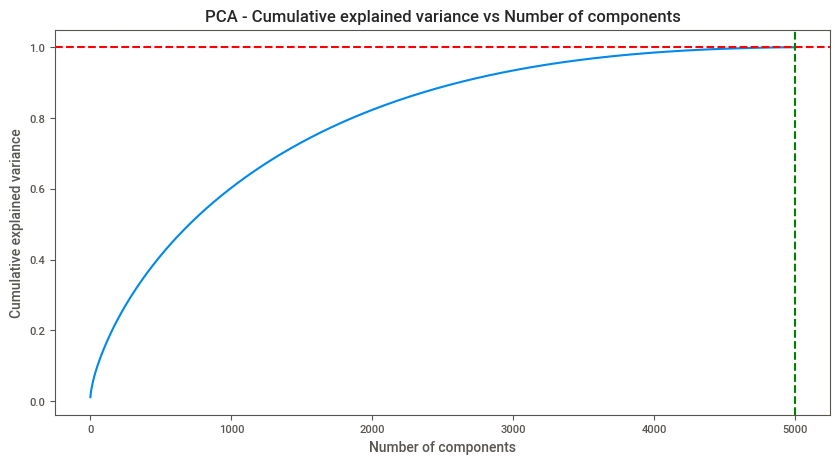

In [94]:
# Plotting explained variance for different number of components

plt.figure(figsize=(10,5))
plt.title('PCA - Cumulative explained variance vs Number of components', fontweight = 'bold')
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.axhline(y = 1, color='red', linestyle='--')
plt.axvline(x = 5000, color='green', linestyle='--')
plt.show()

* ***The green line represents the number of components.***

* ***The red line represents the cumulative explained variance.***

* ***The blue line plots the cumulative sum of the explained variance ratio.***

* ***The point of intersection of the red and green lines is the number of components that are required.***

* ***Both lines intersect at 5000, so these are the number of components that are required.***

In [95]:
# Reimplementing PCA.

pca = PCA(n_components = 5000, random_state = 42)

pca.fit(vec)

PCA(n_components=5000, random_state=42)

* ***Here we are reimplementing PCA with a number of components.***

In [96]:
# These are our transformed features.

x = pca.transform(vec)

# Shape of transformed vectors.

x.shape

(7770, 5000)

* ***Here we are transforming our features.***

In [97]:
x

array([[ 1.92647757e-01, -7.67090857e-03, -2.12492629e-02, ...,
         2.44103840e-17,  7.00635260e-18,  2.23308951e-17],
       [-4.63527097e-02,  2.06085361e-02, -1.59932294e-02, ...,
         1.97149021e-17, -1.43840413e-17,  1.45411615e-18],
       [-4.42656500e-02,  4.24681493e-02,  4.99602844e-02, ...,
        -1.47071590e-17, -3.04343346e-17,  5.04396510e-18],
       ...,
       [-8.58657041e-02,  1.69641492e-02, -5.43823811e-02, ...,
        -2.82362240e-17, -1.19486876e-17, -5.39112949e-19],
       [ 8.35093320e-02, -3.20203919e-02, -4.36778224e-02, ...,
        -5.87155852e-18, -2.65735500e-17,  4.44872142e-17],
       [-7.36110797e-02, -1.21584404e-01, -9.91329434e-02, ...,
        -1.23275120e-17, -2.24384566e-17,  1.67724346e-17]])

* ***These are the sets of features upon which we'll be performing clustering.***

#**ML Model Implementation**

##**Clustering Algorithms**

###**K - Means Clustering**

* ***What is K-Means clustering ?***

 * ***K-means clustering is a popular unsupervised machine learning algorithm used for partitioning data into "k" distinct clusters. Here's a brief explanation of K-means clustering in points :***

  * ***Objective :***

   * ***The goal of K-means clustering is to group data points into "k" clusters, where each point belongs to the cluster with the nearest mean (centroid).***

   * ***The algorithm aims to minimize the total within-cluster sum of squares (variance).***

 * ***Algorithm :***

   * ***Choose the number of clusters "k" and initialize "k" cluster centroids randomly or based on some heuristics.***

   * ***Assign each data point to the nearest cluster centroid based on a distance metric (usually Euclidean distance).***

   * ***Recalculate the centroids of the clusters based on the mean of the data points assigned to each cluster.***

   * ***Repeat steps 2 and 3 until convergence (when the centroids stabilize or a maximum number of iterations is reached).***

* ***There are two methods used to find the ideal value of k, i.e., the number of clusters for a particular model in KMeans clustering :***

 * ***The Elbow Method***

 * ***Silhouette Score Method***

In [98]:
# Calculating value of WSS'S or WCSS's (Within Sum of Squares or Within Cluster Sum of Squares).

from sklearn.cluster import KMeans

wss = []

for i in range(1, 8):

    kmeans = KMeans(n_clusters = i, random_state = 42)

    kmeans.fit(x)

    wss.append(kmeans.inertia_)        # .inertia_ is used to calculate value of wss.
                                       # It provides an indication of how well the data points are grouped into clusters by measuring the compactness of the clusters.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

* ***Calculating the value of WSS's or WCSS's (Within Sum of Squares or Within Cluster Sum of Squares) for k values ranging from 1 to 8 and appending them to wss.***

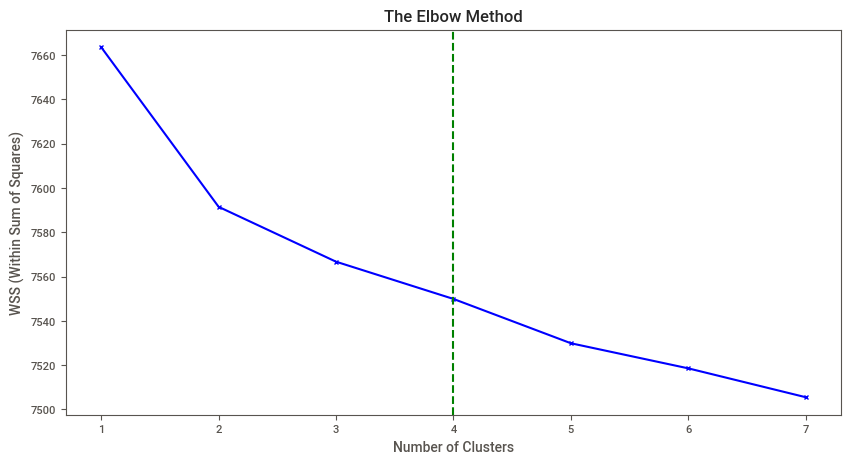

In [99]:
# Elbow method.

plt.figure(figsize=(10,5))

plt.plot(range(1,8), wss, 'bx-')

plt.title('The Elbow Method', fontweight = 'bold')

plt.xlabel('Number of Clusters')

plt.ylabel('WSS (Within Sum of Squares)')

plt.axvline(x = 4, color='green', linestyle='--')

* ***We have to pick the value of k at the "elbow," or the point at which the distortion/inertia begins to decrease linearly.***

* ***Thus for the given data, we conclude that the optimal number of clusters for the data is 4.***

* ***The elbow method is used to find the ideal value of k (the number of clusters).***

* ***It is plotted between the number of clusters and WSS (Within the sum of squares).***

In [100]:
# Silhouette Score Method.

silavg = []

for i in range(2, 8):

    kmeans  =  KMeans(n_clusters = i , random_state = 42)

    kmeans.fit(x)                                                   # Fitting our features into algo. according to k ranging from 2 to 8.

    assgn   =  kmeans.labels_                                       # Calculating which data point is assigned to which cluster.

    scr     =  silhouette_score(x,assgn)                            # Calculating silhouette score.

    silavg.append(scr)                                              # Appending silhouette scores to silavg.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

* ***Silhouette score is used to evaluate the quality of clusters created using clustering algorithms such as K-Means in terms of how well samples are clustered with other samples that are similar to each other. The Silhouette score is calculated for each sample of different clusters.***

* ***Calculating the value of silhouette scores for k values ranging from 2 to 8 and appending them to silavg.***

In [101]:
pd.DataFrame(assgn)

,0
0,6
1,1
2,2
3,0
4,0
...,...
7765,3
7766,2
7767,5
7768,6


* ***This dataframe tells us which data point is assigned to which cluster.***

In [102]:
silavg

[0.006395856755069065,
 0.00739696875393134,
 0.0074900853293716095,
 0.0038561614317871,
 0.004120147412446044,
 0.0038906642835215242]

* ***These are the average silhouette score values for different numbers of clusters.***

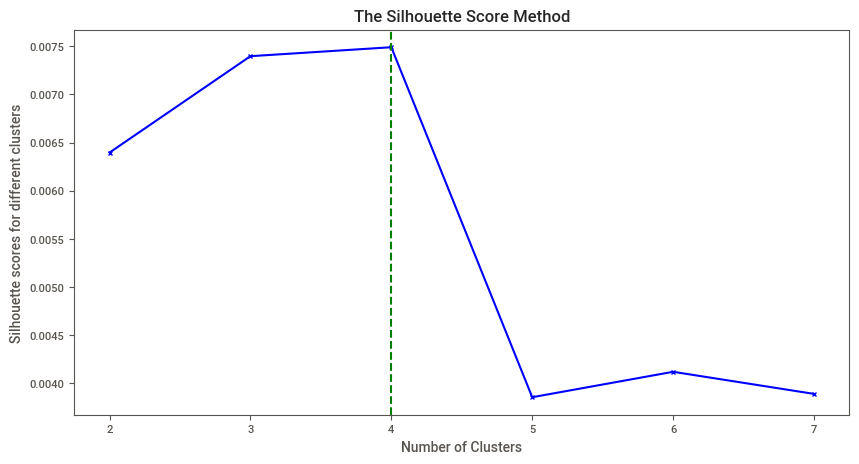

In [103]:
# Silhouette Score Method.

plt.figure(figsize=(10,5))

plt.plot(range(2,8), silavg, 'bx-')

plt.title('The Silhouette Score Method', fontweight = 'bold')

plt.xlabel('Number of Clusters')

plt.ylabel('Silhouette scores for different clusters')

plt.axvline(x = 4, color='green', linestyle='--')

* ***The highest value for the silhouette score we have achieved was when the number of clusters was 4, so we'll be again implementing K-means with 4 clusters.***

* ***Silhouette analysis is be used to study the separation distance between the resulting clusters.***

In [104]:
# Reimplementing KMeans.

kmeans = KMeans(n_clusters = 4, random_state = 42)

kmeans.fit(x)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

* ***Here we are again implementing K-means with four clusters and fitting our data into this algorithm.***

In [113]:
# Evaluation Metrics

from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

print('WSS (Within Sum of Square) :' , kmeans.inertia_)

print('Average Silhouette score   :' , silavg[2])

print('Davies-Bouldin score       :', davies_bouldin_score(x, assgn))

print('Calinski-Harabasz score    :',calinski_harabasz_score(x, assgn))

WSS (Within Sum of Square) : 7549.909535179179
Average Silhouette score   : 0.0074900853293716095
Davies-Bouldin score       : 11.13941456452751
Calinski-Harabasz score    : 27.248341167517914


* ***Davies-Bouldin Index :***

 * ***Lower values indicate better-defined clusters with clear boundaries.***

* ***Calinski-Harabasz Index (Variance Ratio Criterion) :***

 * ***Higher values imply better-defined clusters with larger inter-cluster separation and smaller intra-cluster dispersion.***

In [114]:
# Creating a new column.

df['cluster_number'] = kmeans.labels_

* ***Adding a new column 'cluster_number' to our original datframe that tells us about particular titles belongingness to which cluster.***

In [117]:
df.head()

,si,typ,tit,cst,cnt,da,ry,rtng,dur,li,des,month added,text,cluster_number
0,s1,TV Show,3%,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,August,futur elit inhabit island paradis far crowd sl...,1
1,s2,Movie,7:19,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,December,devast earthquak hit mexico citi trap survivor...,2
2,s3,Movie,23:59,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",December,armi recruit found dead fellow soldier forc co...,2
3,s4,Movie,9,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",November,postapocalypt world ragdol robot hide fear dan...,0
4,s5,Movie,21,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,January,brilliant group student becom cardcount expert...,0


* ***A new column has been added.***

In [124]:
# Taking random samples of our dataframe.

df.sample(10)[['typ', 'tit', 'cst','cnt', 'rtng', 'li', 'des', 'cluster_number']]

,typ,tit,cst,cnt,rtng,li,des,cluster_number
54,Movie,100 Meters,"Dani Rovira, Karra Elejalde, Alexandra Jiménez...","Portugal, Spain",TV-MA,"Dramas, International Movies, Sports Movies",A man who is diagnosed with multiple sclerosis...,2
758,Movie,Basic Instinct,"Michael Douglas, Sharon Stone, George Dzundza,...","United States, France",R,"Classic Movies, Thrillers",A detective investigating a rock star's brutal...,0
567,Movie,"Aram, Aram","John Roohinian, Levon Sharafyan, Sevak Hakoyan...",United States,TV-14,"Dramas, Independent Movies",Newly orphaned Aram leaves Beirut to live with...,0
3272,Movie,Kaakan,"Jitendra Joshi, Urmila Kanitkar, Ashutosh Gaik...",India,TV-PG,"Dramas, International Movies, Romantic Movies",Star-crossed lovers from different social stra...,2
701,Movie,Badland,"Kevin Makely, Bruce Dern, Mira Sorvino, Trace ...",United States,TV-14,Dramas,A detective with a license to kill roams the O...,0
2457,TV Show,Godless,"Jeff Daniels, Michelle Dockery, Jack O'Connell...",United States,TV-MA,TV Dramas,A ruthless outlaw terrorizes the West in searc...,0
2241,TV Show,Forged in Fire,Wil Willis,United States,TV-14,Reality TV,Bladesmiths vie for a cash prize by forging th...,0
5934,TV Show,Swami Baba Ramdev: The Untold Story,"Naman Jain, Kranti Prakash Jha, Tej Sapru, Che...",United States,TV-14,"International TV Shows, TV Dramas","Born into poverty and denied an education, a v...",1
6002,Movie,Team Foxcatcher,Unavailable,United States,TV-MA,"Documentaries, Sports Movies","With never-before seen home video, this film r...",0
7590,Movie,Whindersson Nunes: Adult,Whindersson Nunes,Brazil,TV-MA,Stand-Up Comedy,Brazilian YouTube sensation Whindersson Nunes ...,0


* ***Taking random samples of our dataframe with these features.***

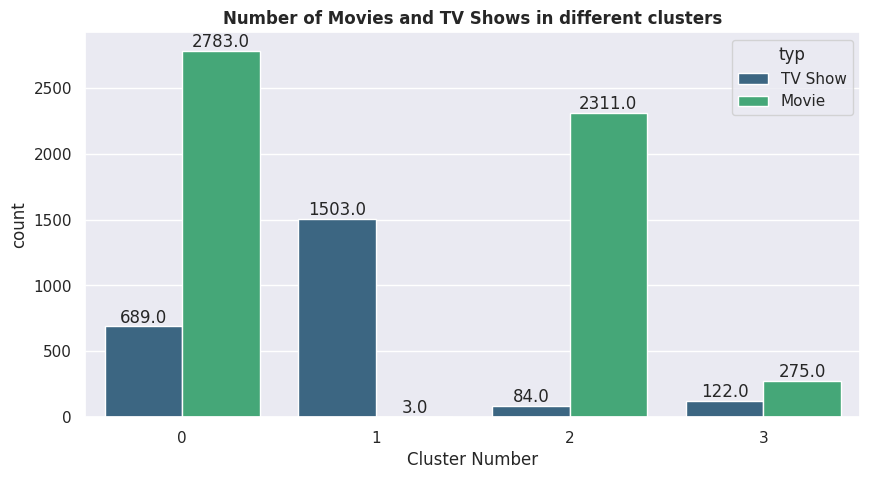

In [140]:
# Cluster Analysis.

sns.set(style="darkgrid")

plt.figure(figsize = (10,5))

ax = sns.countplot(x = df['cluster_number'], hue = df['typ'], palette = 'viridis')

plt.title('Number of Movies and TV Shows in different clusters', fontweight = 'bold')

plt.xlabel('Cluster Number')

# To annotate the countplot.

for p in ax.patches:
    ax.annotate(f"{p.get_height()}", (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

* ***The first cluster has the highest number of movies.***

* ***The second cluster has the highest number of TV Shows and lowest number of movies.***

* ***The third cluster has the lowest number of TV Shows.***

* ***The fourth cluster has a very small number of TV shows and movies.***

###**WordCloud Visualisation for KMeans**